<img src="R COVER.jpg" alt="Italian Trulli">

# PROJECT GOAL
<br>

The **Requirement** of a Business Problem **is to develop a predictive model to Analyse and Classify the Remuneration of Employee** in a Corporate organization using **R Statistical Language**.
<br>

# CHALLENGES IN SOLVING PROBLEM

**1)	Imbalance Data**

**2)	More Categorical Variables**

**3)	Some Numerical Features with Special Characters**

**4)	Chances of Overfitting**

**5)	Chances to be have high Dispersion**
<br>

# FEATURES DETAILS
<p style="font-size:15px"><b>[HTML FORMAT]</b></p>
<br>
<html>
<head>
<style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}

tr:nth-child(even) {
  background-color: #dddddd;
}
</style>
</head>
<body>

<h2></h2>

<table>
  <tr>
    <th>FEATURE NAMES</th>
    <th>EXPLANATION</th>

  </tr>
  <tr>
    <td><b>Age</b></td>
    <td>Age of the Employee</td>

  </tr>
  <tr>
      <td><b>Work class</b></td>
    <td>Work Class of the Employee <b>[Categorical Variable]</b></td>
  
  </tr>
  <tr>
    <td><b>Fnlwgt</b></td>
    <td>Final Weight</td>
 
  </tr>
  <tr>
    <td><b>Education</b></td>
    <td>Employee Educational Qualification <b>[Categorical Variable]</b></td>
 
  </tr>
  <tr>
    <td><b>Education Num</b></td>
    <td>Education Number of Years</td>

  </tr>
  <tr>
    <td><b>Marital Status</b></td>
    <td>Marital Status of Employee <b>[Categorical Variable]</b></td>

  </tr>
    <tr>
        <td><b>Occupation</b></td>
    <td>GOccupation of Employee <b>[Categorical Variable]</b></td>

  </tr>
    <tr>
    <td><b>Relationship</b></td>
    <td>Relationship of Employee <b>[Categorical Variable]</b></td>

  </tr>
    <tr>
    <td><b>Race</b></td>
    <td>Race of Employee <b>[Categorical Variable]</b></td>

  </tr>
    <tr>
    <td><b>Sex</b></td>
    <td>Sex of Employee <b>[Categorical Variable]</b></td>

  </tr>
    <tr>
    <td><b>Capital Gain</b></td>
    <td>Capital Gain of Employee</td>

  </tr>
    <tr>
    <td><b>Capital Loss</b></td>
    <td>Capital Loss of Employee</td>

  </tr>
    <tr>
    <td><b>Hours per week</b></td>
    <td>Working Hours per week</td>

  </tr>
    <tr>
    <td><b>Native Country</b></td>
    <td>Native Country <b>[Categorical Variable]</b></td>

  </tr>
    <tr>
    <td><b>Remuneration</b></td>
    <td>Income of Employee <b>[Categorical Variable]</b></td>

  </tr>
</table>

</body>
</html>



# Import Libraries

In [1]:
library(car)
library(reshape)
library(mice)
library(caret)
library(plotly)
library(randomForest)
library(class)
library(e1071)
library(party)
library(corrplot)

Loading required package: carData
Warning message:
"package 'mice' was built under R version 3.6.3"
Attaching package: 'mice'

The following objects are masked from 'package:base':

    cbind, rbind

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Warning message:
"package 'plotly' was built under R version 3.6.3"
Attaching package: 'plotly'

The following object is masked from 'package:ggplot2':

    last_plot

The following object is masked from 'package:reshape':

    rename

The following object is masked from 'package:stats':

    filter

The following object is masked from 'package:graphics':

    layout

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin


Attaching package: 'class'

The following o

# Import Data

In [2]:
data <- read.csv("E:/Downlload/adult.csv")
head(data)

age workclass fnlwgt education    education.num marital.status
1 90  ?          77053 HS-grad       9            Widowed       
2 82  Private   132870 HS-grad       9            Widowed       
3 66  ?         186061 Some-college 10            Widowed       
4 54  Private   140359 7th-8th       4            Divorced      
5 41  Private   264663 Some-college 10            Separated     
6 34  Private   216864 HS-grad       9            Divorced      
  occupation        relationship  race  sex    capital.gain capital.loss
1 ?                 Not-in-family White Female 0            4356        
2 Exec-managerial   Not-in-family White Female 0            4356        
3 ?                 Unmarried     Black Female 0            4356        
4 Machine-op-inspct Unmarried     White Female 0            3900        
5 Prof-specialty    Own-child     White Female 0            3900        
6 Other-service     Unmarried     White Female 0            3770        
  hours.per.week native.country income
1 40             United-States  <=50K 
2 18             United-States  <=50K 
3 40             United-States  <=50K 
4 40             United-States  <=50K 
5 40             United-States  <=50K 
6 45             United-States  <=50K

In [3]:
dim(data)

[1] 32561    15

# Data Preprocessing

In [4]:
sapply(data, class)

age      workclass         fnlwgt      education  education.num 
     "integer"       "factor"      "integer"       "factor"      "integer" 
marital.status     occupation   relationship           race            sex 
      "factor"       "factor"       "factor"       "factor"       "factor" 
  capital.gain   capital.loss hours.per.week native.country         income 
     "integer"      "integer"      "integer"       "factor"       "factor"

In [5]:
colSums(is.na(data))

age      workclass         fnlwgt      education  education.num 
             0              0              0              0              0 
marital.status     occupation   relationship           race            sex 
             0              0              0              0              0 
  capital.gain   capital.loss hours.per.week native.country         income 
             0              0              0              0              0

In [6]:
is.na(data)<-data=='?'

In [7]:
colSums(is.na(data))

age      workclass         fnlwgt      education  education.num 
             0           1836              0              0              0 
marital.status     occupation   relationship           race            sex 
             0           1843              0              0              0 
  capital.gain   capital.loss hours.per.week native.country         income 
             0              0              0            583              0

In [9]:
# Mode <- function (x, na.rm) {
#     xtab <- table(x)
#     xmode <- names(which(xtab == max(xtab)))
#     if (length(xmode) > 1)
#         xmode <- ">1 mode"
#     return(xmode)
# }

Mode <- function(x) {
  uniq <- unique(x)
  tab <- tabulate(match(x, uniq))
  uniq[tab == max(tab)]
}

In [10]:
Mode(data$workclass)

[1] Private
9 Levels: ? Federal-gov Local-gov Never-worked Private ... Without-pay

In [11]:
Mode(data$occupation)

[1] Prof-specialty
15 Levels: ? Adm-clerical Armed-Forces Craft-repair ... Transport-moving

In [12]:
Mode(data$native.country)

[1] United-States
42 Levels: ? Cambodia Canada China Columbia Cuba Dominican-Republic ... Yugoslavia

In [13]:
library(Hmisc)
data$workclass=impute(data$workclass, mode)
data$occupation=impute(data$occupation, mode)
data$native.country=impute(data$native.country, mode)

Loading required package: survival

Attaching package: 'survival'

The following object is masked from 'package:caret':

    cluster

Loading required package: Formula
Warning message:
"package 'Formula' was built under R version 3.6.3"
Attaching package: 'Hmisc'

The following object is masked from 'package:e1071':

    impute

The following object is masked from 'package:plotly':

    subplot

The following objects are masked from 'package:base':

    format.pval, units



In [14]:
colSums(is.na(data))

age      workclass         fnlwgt      education  education.num 
             0              0              0              0              0 
marital.status     occupation   relationship           race            sex 
             0              0              0              0              0 
  capital.gain   capital.loss hours.per.week native.country         income 
             0              0              0              0              0

In [15]:
sapply(data, class)

$age
[1] "integer"

$workclass
[1] "impute" "factor"

$fnlwgt
[1] "integer"

$education
[1] "factor"

$education.num
[1] "integer"

$marital.status
[1] "factor"

$occupation
[1] "impute" "factor"

$relationship
[1] "factor"

$race
[1] "factor"

$sex
[1] "factor"

$capital.gain
[1] "integer"

$capital.loss
[1] "integer"

$hours.per.week
[1] "integer"

$native.country
[1] "impute" "factor"

$income
[1] "factor"

In [16]:
# remove_outliers <- function(x, na.rm = TRUE, ...) {
#   qnt <- quantile(x, probs=c(.25, .75), na.rm = na.rm, ...)
#   H <- 1.5 * IQR(x, na.rm = na.rm)
#   y <- x
#   y[x < (qnt[1] - H)] <- NA
#   y[x > (qnt[2] + H)] <- NA
#   y
# }

In [17]:
dim(data)

[1] 32561    15

# Feature Engineering

In [18]:
cat_var <- unlist(lapply(data, is.factor)) 
cat_var <- data[cat_var]
head(cat_var)

workclass education    marital.status occupation        relationship  race 
1 Private   HS-grad      Widowed        Prof-specialty    Not-in-family White
2 Private   HS-grad      Widowed        Exec-managerial   Not-in-family White
3 Private   Some-college Widowed        Prof-specialty    Unmarried     Black
4 Private   7th-8th      Divorced       Machine-op-inspct Unmarried     White
5 Private   Some-college Separated      Prof-specialty    Own-child     White
6 Private   HS-grad      Divorced       Other-service     Unmarried     White
  sex    native.country income
1 Female United-States  <=50K 
2 Female United-States  <=50K 
3 Female United-States  <=50K 
4 Female United-States  <=50K 
5 Female United-States  <=50K 
6 Female United-States  <=50K

In [19]:
cat_var_onehot <- subset(cat_var, select = -c(2,9) )
head(cat_var_onehot)

workclass marital.status occupation        relationship  race  sex   
1 Private   Widowed        Prof-specialty    Not-in-family White Female
2 Private   Widowed        Exec-managerial   Not-in-family White Female
3 Private   Widowed        Prof-specialty    Unmarried     Black Female
4 Private   Divorced       Machine-op-inspct Unmarried     White Female
5 Private   Separated      Prof-specialty    Own-child     White Female
6 Private   Divorced       Other-service     Unmarried     White Female
  native.country
1 United-States 
2 United-States 
3 United-States 
4 United-States 
5 United-States 
6 United-States

In [20]:
cat_var_label <- cat_var %>% select(2, 9)
head(cat_var_label)

education    income
1 HS-grad      <=50K 
2 HS-grad      <=50K 
3 Some-college <=50K 
4 7th-8th      <=50K 
5 Some-college <=50K 
6 HS-grad      <=50K

In [21]:
dmy <- dummyVars(" ~ .", data = cat_var_onehot)

In [22]:
cat_var_onehot <- data.frame(predict(dmy, newdata = cat_var_onehot))
head(cat_var_onehot)

workclass.. workclass.Federal.gov workclass.Local.gov workclass.Never.worked
1 0           0                     0                   0                     
2 0           0                     0                   0                     
3 0           0                     0                   0                     
4 0           0                     0                   0                     
5 0           0                     0                   0                     
6 0           0                     0                   0                     
  workclass.Private workclass.Self.emp.inc workclass.Self.emp.not.inc
1 1                 0                      0                         
2 1                 0                      0                         
3 1                 0                      0                         
4 1                 0                      0                         
5 1                 0                      0                         
6 1                 0                      0                         
  workclass.State.gov workclass.Without.pay marital.status.Divorced ...
1 0                   0                     0                       ...
2 0                   0                     0                       ...
3 0                   0                     0                       ...
4 0                   0                     1                       ...
5 0                   0                     0                       ...
6 0                   0                     1                       ...
  native.country.Portugal native.country.Puerto.Rico native.country.Scotland
1 0                       0                          0                      
2 0                       0                          0                      
3 0                       0                          0                      
4 0                       0                          0                      
5 0                       0                          0                      
6 0                       0                          0                      
  native.country.South native.country.Taiwan native.country.Thailand
1 0                    0                     0                      
2 0                    0                     0                      
3 0                    0                     0                      
4 0                    0                     0                      
5 0                    0                     0                      
6 0                    0                     0                      
  native.country.Trinadad.Tobago native.country.United.States
1 0                              1                           
2 0                              1                           
3 0                              1                           
4 0                              1                           
5 0                              1                           
6 0                              1                           
  native.country.Vietnam native.country.Yugoslavia
1 0                      0                        
2 0                      0                        
3 0                      0                        
4 0                      0                        
5 0                      0                        
6 0                      0

In [23]:
sapply(cat_var_label, function(x) length(unique(x)))

education    income 
       16         2

In [24]:
unique(cat_var_label$education)

[1] HS-grad      Some-college 7th-8th      10th         Doctorate   
 [6] Prof-school  Bachelors    Masters      11th         Assoc-acdm  
[11] Assoc-voc    1st-4th      5th-6th      12th         9th         
[16] Preschool   
16 Levels: 10th 11th 12th 1st-4th 5th-6th 7th-8th 9th Assoc-acdm ... Some-college

In [25]:
unique(cat_var_label$income)

[1] <=50K >50K 
Levels: <=50K >50K

In [26]:
library(plyr)
cat_var_label$education <- revalue(cat_var_label$education, c("HS-grad" = 16 , "Some-college" = 15 , "7th-8th" = 14 ,"10th" = 13,"Doctorate" = 12,"Prof-school" = 11,"Bachelors" = 10,"Masters" = 9,"11th" = 8,"Assoc-acdm" = 7,"Assoc-voc" = 6,"1st-4th" = 5,"5th-6th" = 4,"12th" = 3,"9th" = 2,"Preschool" = 1))
cat_var_label$income <- revalue(cat_var_label$income, c(">50K" = 1 , "<=50K" = 0))


Attaching package: 'plyr'

The following objects are masked from 'package:Hmisc':

    is.discrete, summarize

The following object is masked from 'package:modeltools':

    empty

The following objects are masked from 'package:plotly':

    arrange, mutate, rename, summarise

The following objects are masked from 'package:reshape':

    rename, round_any



In [27]:
head(cat_var_label)

education income
1 16        0     
2 16        0     
3 15        0     
4 14        0     
5 15        0     
6 16        0

In [28]:
cat_var <- cbind(cat_var_onehot,cat_var_label)
head(cat_var)

workclass.. workclass.Federal.gov workclass.Local.gov workclass.Never.worked
1 0           0                     0                   0                     
2 0           0                     0                   0                     
3 0           0                     0                   0                     
4 0           0                     0                   0                     
5 0           0                     0                   0                     
6 0           0                     0                   0                     
  workclass.Private workclass.Self.emp.inc workclass.Self.emp.not.inc
1 1                 0                      0                         
2 1                 0                      0                         
3 1                 0                      0                         
4 1                 0                      0                         
5 1                 0                      0                         
6 1                 0                      0                         
  workclass.State.gov workclass.Without.pay marital.status.Divorced ...
1 0                   0                     0                       ...
2 0                   0                     0                       ...
3 0                   0                     0                       ...
4 0                   0                     1                       ...
5 0                   0                     0                       ...
6 0                   0                     1                       ...
  native.country.Scotland native.country.South native.country.Taiwan
1 0                       0                    0                    
2 0                       0                    0                    
3 0                       0                    0                    
4 0                       0                    0                    
5 0                       0                    0                    
6 0                       0                    0                    
  native.country.Thailand native.country.Trinadad.Tobago
1 0                       0                             
2 0                       0                             
3 0                       0                             
4 0                       0                             
5 0                       0                             
6 0                       0                             
  native.country.United.States native.country.Vietnam native.country.Yugoslavia
1 1                            0                      0                        
2 1                            0                      0                        
3 1                            0                      0                        
4 1                            0                      0                        
5 1                            0                      0                        
6 1                            0                      0                        
  education income
1 16        0     
2 16        0     
3 15        0     
4 14        0     
5 15        0     
6 16        0

In [29]:
num_var <- unlist(lapply(data, is.numeric)) 
num_var <- data[num_var]
head(num_var)

age fnlwgt education.num capital.gain capital.loss hours.per.week
1 90   77053  9            0            4356         40            
2 82  132870  9            0            4356         18            
3 66  186061 10            0            4356         40            
4 54  140359  4            0            3900         40            
5 41  264663 10            0            3900         40            
6 34  216864  9            0            3770         45

### Checking Skew Correction

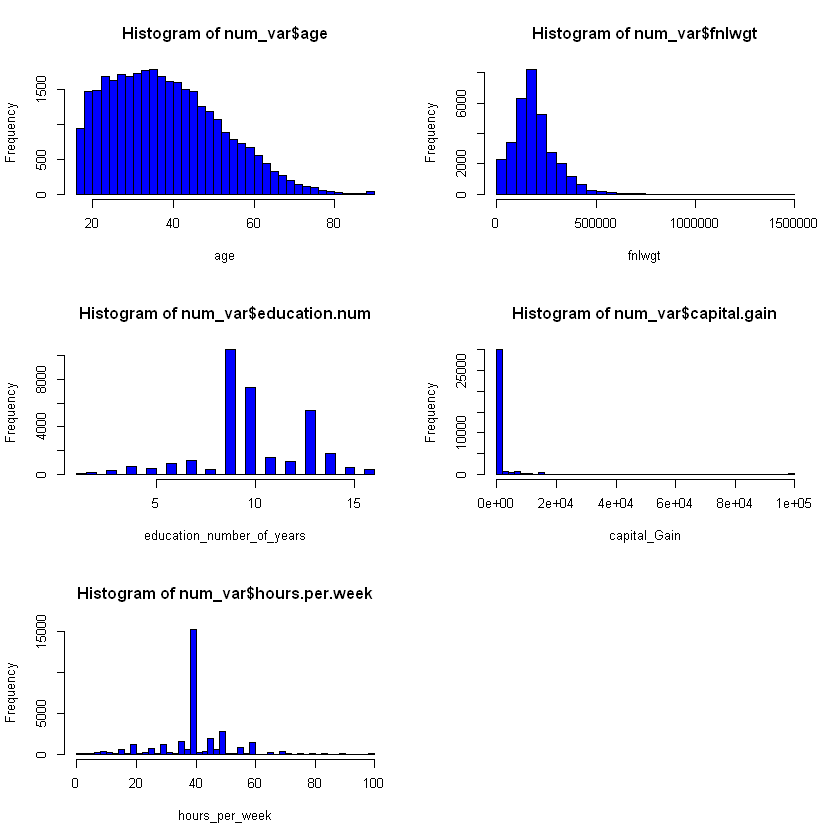

In [30]:
# age <- num_var$age
# fnlwgt <- num_var$fnlwgt
# education_num <- num_var$education.num
# capital_Gain <- num_var$capital.gain
# hours_per_week <- num_var$hours.per.week
par( mfrow = c(3,2))
hist(num_var$age,xlab = "age",col = "blue",border = "black", breaks = 50)
hist(num_var$fnlwgt,xlab = "fnlwgt",col = "blue",border = "black", breaks = 50)
hist(num_var$education.num,xlab = "education_number_of_years",col = "blue",border = "black", breaks = 50)
hist(num_var$capital.gain,xlab = "capital_Gain",col = "blue",border = "black", breaks = 50)
hist(num_var$hours.per.week,xlab = "hours_per_week",col = "blue",border = "black", breaks = 50)

In [31]:
df = cbind(num_var,cat_var)
head(df)

age fnlwgt education.num capital.gain capital.loss hours.per.week workclass..
1 90   77053  9            0            4356         40             0          
2 82  132870  9            0            4356         18             0          
3 66  186061 10            0            4356         40             0          
4 54  140359  4            0            3900         40             0          
5 41  264663 10            0            3900         40             0          
6 34  216864  9            0            3770         45             0          
  workclass.Federal.gov workclass.Local.gov workclass.Never.worked ...
1 0                     0                   0                      ...
2 0                     0                   0                      ...
3 0                     0                   0                      ...
4 0                     0                   0                      ...
5 0                     0                   0                      ...
6 0                     0                   0                      ...
  native.country.Scotland native.country.South native.country.Taiwan
1 0                       0                    0                    
2 0                       0                    0                    
3 0                       0                    0                    
4 0                       0                    0                    
5 0                       0                    0                    
6 0                       0                    0                    
  native.country.Thailand native.country.Trinadad.Tobago
1 0                       0                             
2 0                       0                             
3 0                       0                             
4 0                       0                             
5 0                       0                             
6 0                       0                             
  native.country.United.States native.country.Vietnam native.country.Yugoslavia
1 1                            0                      0                        
2 1                            0                      0                        
3 1                            0                      0                        
4 1                            0                      0                        
5 1                            0                      0                        
6 1                            0                      0                        
  education income
1 16        0     
2 16        0     
3 15        0     
4 14        0     
5 15        0     
6 16        0

In [32]:
dim(df)

[1] 32561    94

In [33]:
df$education <- as.integer(df$education)

In [34]:
sapply(df, class)

age 
                                "integer" 
                                   fnlwgt 
                                "integer" 
                            education.num 
                                "integer" 
                             capital.gain 
                                "integer" 
                             capital.loss 
                                "integer" 
                           hours.per.week 
                                "integer" 
                              workclass.. 
                                "numeric" 
                    workclass.Federal.gov 
                                "numeric" 
                      workclass.Local.gov 
                                "numeric" 
                   workclass.Never.worked 
                                "numeric" 
                        workclass.Private 
                                "numeric" 
                   workclass.Self.emp.inc 
                                "numeric" 
               workclass.Self.emp.not.inc 
                                "numeric" 
                      workclass.State.gov 
                                "numeric" 
                    workclass.Without.pay 
                                "numeric" 
                  marital.status.Divorced 
                                "numeric" 
         marital.status.Married.AF.spouse 
                                "numeric" 
        marital.status.Married.civ.spouse 
                                "numeric" 
     marital.status.Married.spouse.absent 
                                "numeric" 
             marital.status.Never.married 
                                "numeric" 
                 marital.status.Separated 
                                "numeric" 
                   marital.status.Widowed 
                                "numeric" 
                             occupation.. 
                                "numeric" 
                  occupation.Adm.clerical 
                                "numeric" 
                  occupation.Armed.Forces 
                                "numeric" 
                  occupation.Craft.repair 
                                "numeric" 
               occupation.Exec.managerial 
                                "numeric" 
               occupation.Farming.fishing 
                                "numeric" 
             occupation.Handlers.cleaners 
                                "numeric" 
             occupation.Machine.op.inspct 
                                "numeric" 
                 occupation.Other.service 
                                "numeric" 
               occupation.Priv.house.serv 
                                "numeric" 
                occupation.Prof.specialty 
                                "numeric" 
               occupation.Protective.serv 
                                "numeric" 
                         occupation.Sales 
                                "numeric" 
                  occupation.Tech.support 
                                "numeric" 
              occupation.Transport.moving 
                                "numeric" 
                     relationship.Husband 
                                "numeric" 
               relationship.Not.in.family 
                                "numeric" 
              relationship.Other.relative 
                                "numeric" 
                   relationship.Own.child 
                                "numeric" 
                   relationship.Unmarried 
                                "numeric" 
                        relationship.Wife 
                                "numeric" 
                  race.Amer.Indian.Eskimo 
                                "numeric" 
                  race.Asian.Pac.Islander 
                                "numeric" 
                               race.Black 
                                "numeric" 
                               race.Other 
                                "numeri

In [35]:
dff = subset(df, select = -c(94))
names(dff)

[1] "age"                                      
 [2] "fnlwgt"                                   
 [3] "education.num"                            
 [4] "capital.gain"                             
 [5] "capital.loss"                             
 [6] "hours.per.week"                           
 [7] "workclass.."                              
 [8] "workclass.Federal.gov"                    
 [9] "workclass.Local.gov"                      
[10] "workclass.Never.worked"                   
[11] "workclass.Private"                        
[12] "workclass.Self.emp.inc"                   
[13] "workclass.Self.emp.not.inc"               
[14] "workclass.State.gov"                      
[15] "workclass.Without.pay"                    
[16] "marital.status.Divorced"                  
[17] "marital.status.Married.AF.spouse"         
[18] "marital.status.Married.civ.spouse"        
[19] "marital.status.Married.spouse.absent"     
[20] "marital.status.Never.married"             
[21] "marital.status.Separated"                 
[22] "marital.status.Widowed"                   
[23] "occupation.."                             
[24] "occupation.Adm.clerical"                  
[25] "occupation.Armed.Forces"                  
[26] "occupation.Craft.repair"                  
[27] "occupation.Exec.managerial"               
[28] "occupation.Farming.fishing"               
[29] "occupation.Handlers.cleaners"             
[30] "occupation.Machine.op.inspct"             
[31] "occupation.Other.service"                 
[32] "occupation.Priv.house.serv"               
[33] "occupation.Prof.specialty"                
[34] "occupation.Protective.serv"               
[35] "occupation.Sales"                         
[36] "occupation.Tech.support"                  
[37] "occupation.Transport.moving"              
[38] "relationship.Husband"                     
[39] "relationship.Not.in.family"               
[40] "relationship.Other.relative"              
[41] "relationship.Own.child"                   
[42] "relationship.Unmarried"                   
[43] "relationship.Wife"                        
[44] "race.Amer.Indian.Eskimo"                  
[45] "race.Asian.Pac.Islander"                  
[46] "race.Black"                               
[47] "race.Other"                               
[48] "race.White"                               
[49] "sex.Female"                               
[50] "sex.Male"                                 
[51] "native.country.."                         
[52] "native.country.Cambodia"                  
[53] "native.country.Canada"                    
[54] "native.country.China"                     
[55] "native.country.Columbia"                  
[56] "native.country.Cuba"                      
[57] "native.country.Dominican.Republic"        
[58] "native.country.Ecuador"                   
[59] "native.country.El.Salvador"               
[60] "native.country.England"                   
[61] "native.country.France"                    
[62] "native.country.Germany"                   
[63] "native.country.Greece"                    
[64] "native.country.Guatemala"                 
[65] "native.country.Haiti"                     
[66] "native.country.Holand.Netherlands"        
[67] "native.country.Honduras"                  
[68] "native.country.Hong"                      
[69] "native.country.Hungary"                   
[70] "native.country.India"                     
[71] "native.country.Iran"                      
[72] "native.country.Ireland"                   
[73] "native.country.Italy"                     
[74] "native.country.Jamaica"                   
[75] "native.country.Japan"                     
[76] "native.country.Laos"                      
[77] "native.country.Mexico"                    
[78] "native.country.Nicaragua"                 
[79] "native.country.Outlying.US.Guam.USVI.etc."
[80] "native.country.Peru"                      
[81] "native.country.Philippines"               
[82] "native.country.Poland"    

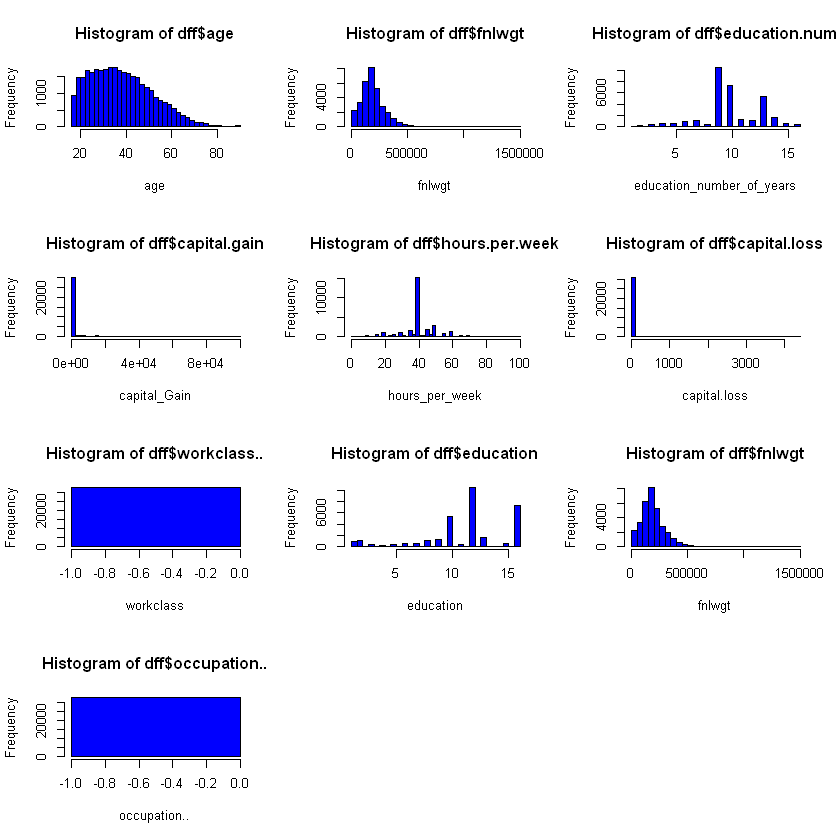

In [36]:
par( mfrow = c(4,3))
hist(dff$age,xlab = "age",col = "blue",border = "black", breaks = 50)
hist(dff$fnlwgt,xlab = "fnlwgt",col = "blue",border = "black", breaks = 50)
hist(dff$education.num,xlab = "education_number_of_years",col = "blue",border = "black", breaks = 50)
hist(dff$capital.gain,xlab = "capital_Gain",col = "blue",border = "black", breaks = 50)
hist(dff$hours.per.week,xlab = "hours_per_week",col = "blue",border = "black", breaks = 50)
hist(dff$capital.loss,xlab = "capital.loss",col = "blue",border = "black", breaks = 50)
hist(dff$workclass..,xlab = "workclass",col = "blue",border = "black", breaks = 50)
hist(dff$education,xlab = "education",col = "blue",border = "black", breaks = 50)
hist(dff$fnlwgt,xlab = "fnlwgt",col = "blue",border = "black", breaks = 50)
hist(dff$occupation..,xlab = "occupation..",col = "blue",border = "black", breaks = 50)

### Box Cox Transformation for Skew Correction

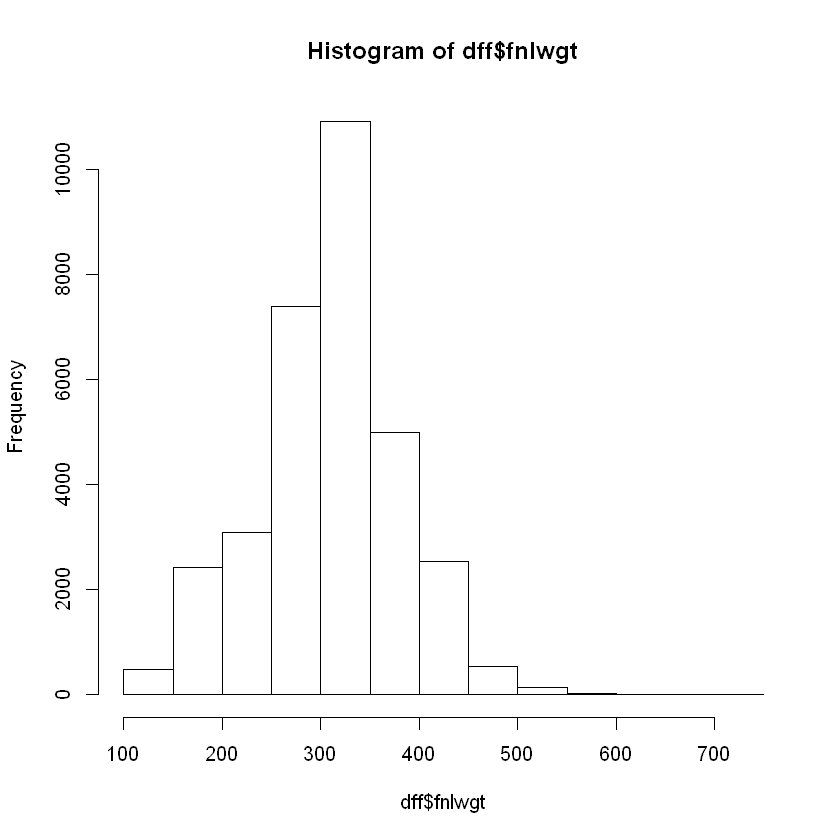

In [37]:
library(caret)
boxmod1 <- BoxCoxTrans(dff$fnlwgt)
bostmod <- dff
dff$fnlwgt<- predict(boxmod1,newdata = dff$fnlwgt)
hist(dff$fnlwgt)

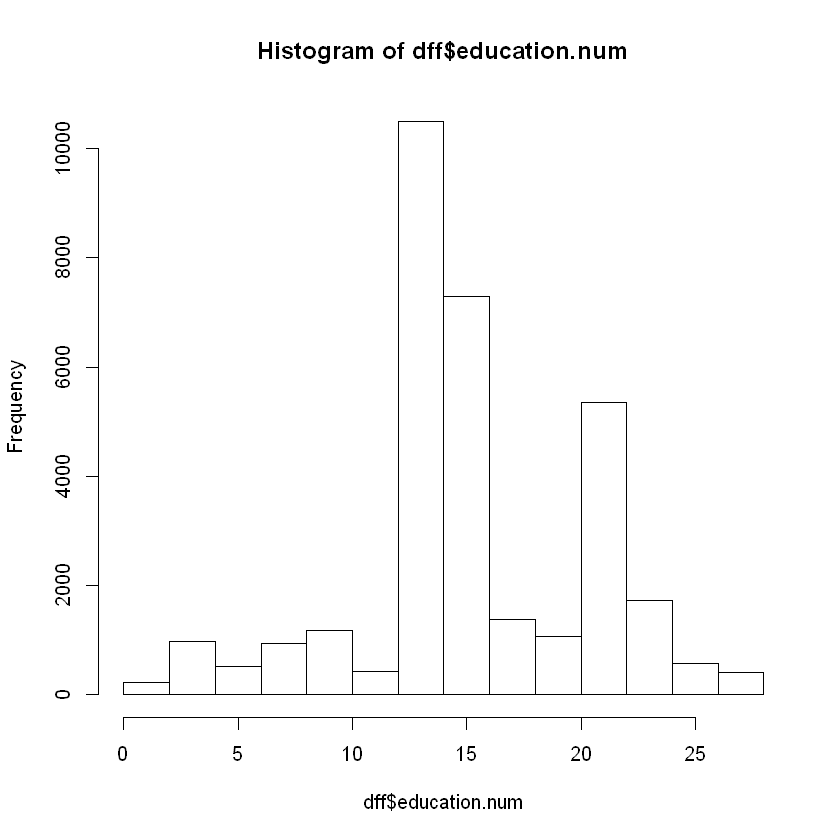

In [38]:
library(caret)
boxmod1 <- BoxCoxTrans(dff$education.num)
bostmod <- dff
dff$education.num<- predict(boxmod1,newdata = dff$education.num)
hist(dff$education.num)

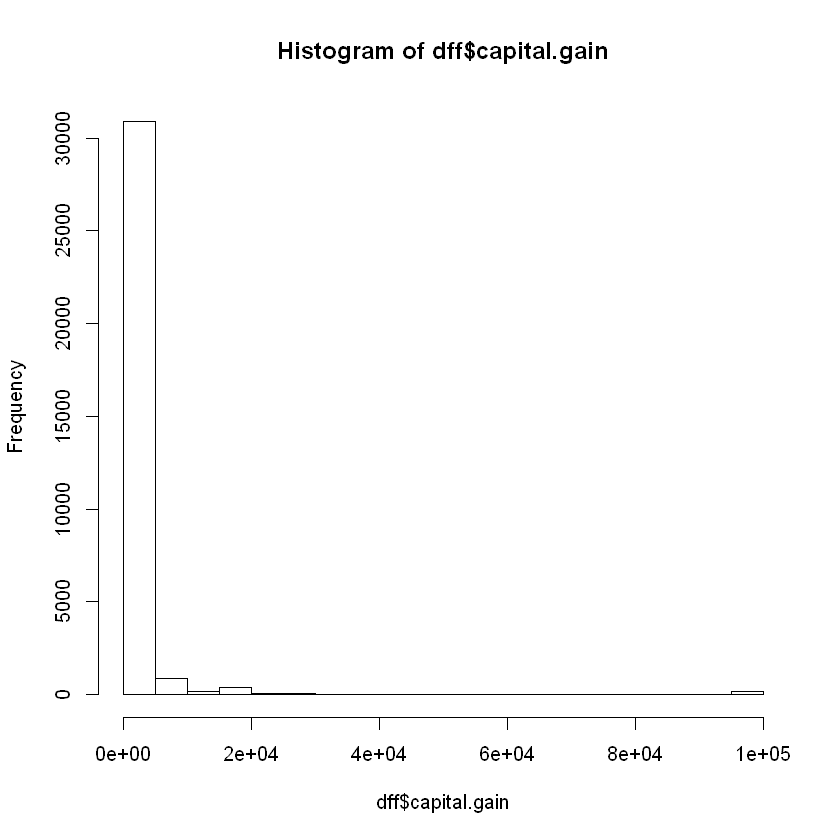

In [39]:
library(caret)
boxmod1 <- BoxCoxTrans(dff$capital.gain)
bostmod <- dff
dff$capital.gain<- predict(boxmod1,newdata = dff$capital.gain)
hist(dff$capital.gain)

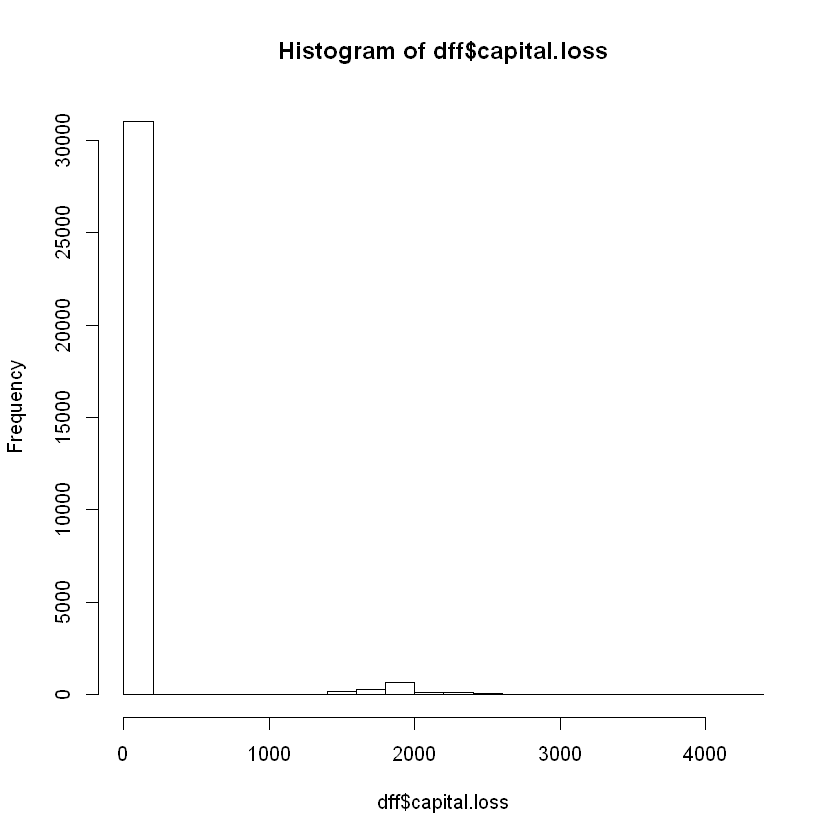

In [40]:
library(caret)
boxmod1 <- BoxCoxTrans(dff$capital.loss)
bostmod <- dff
dff$capital.loss<- predict(boxmod1,newdata = dff$capital.loss)
hist(dff$capital.loss)

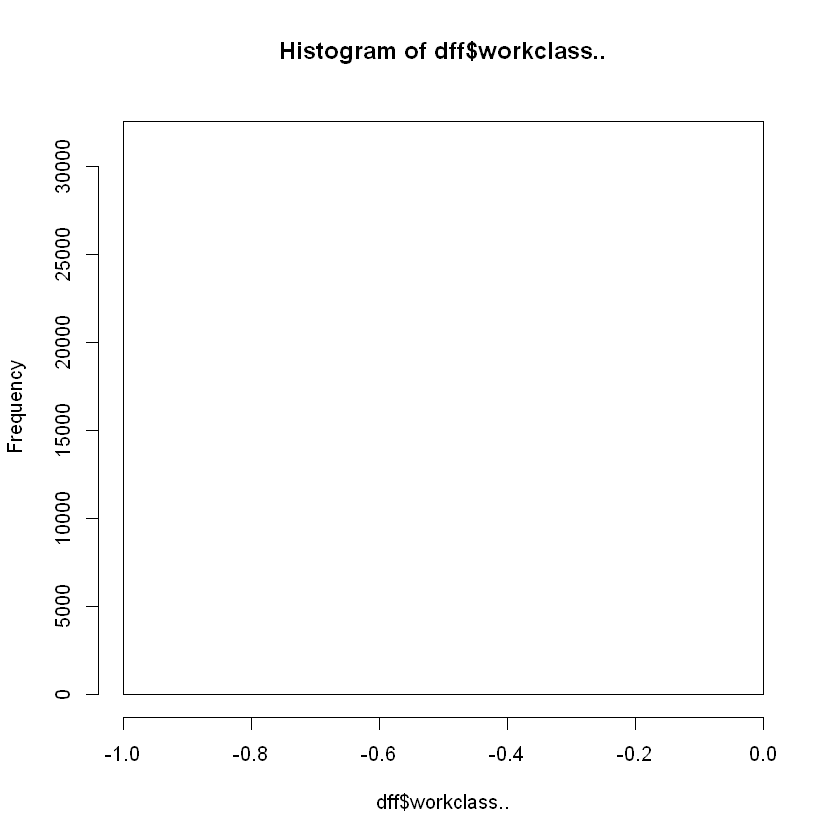

In [41]:
library(caret)
boxmod1 <- BoxCoxTrans(dff$workclass..)
bostmod <- dff
dff$workclass..<- predict(boxmod1,newdata = dff$workclass..)
hist(dff$workclass..)

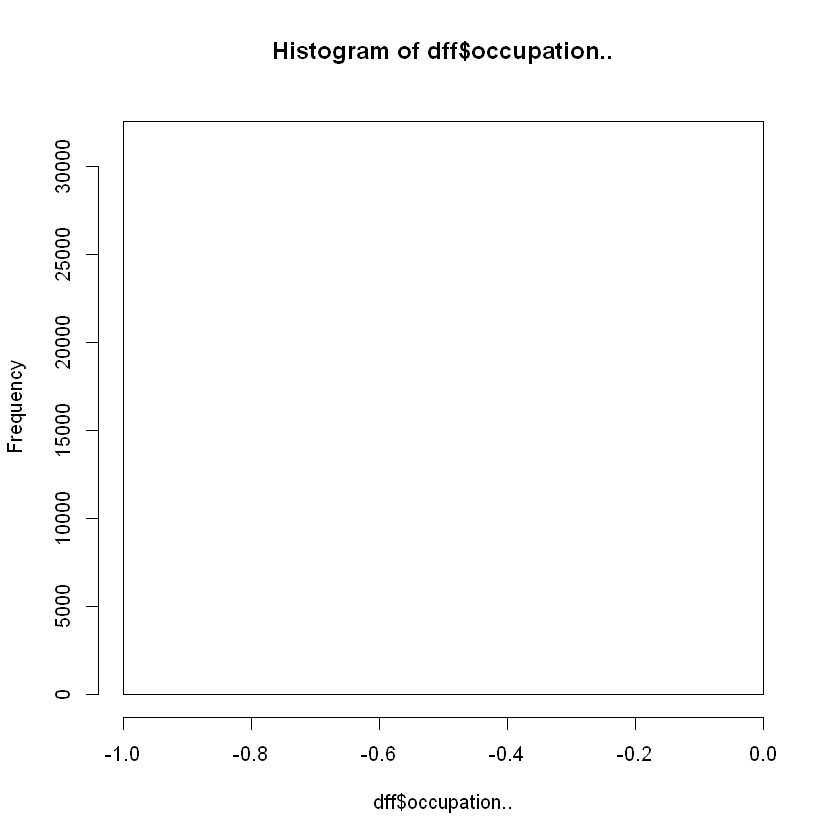

In [42]:
library(caret)
boxmod1 <- BoxCoxTrans(dff$occupation..)
bostmod <- dff
dff$occupation..<- predict(boxmod1,newdata = dff$occupation..)
hist(dff$occupation..)

In [43]:
head(dff)

age fnlwgt   education.num capital.gain capital.loss hours.per.week
1 90  222.7453 12.614337     0            4356         40            
2 82  277.5985 12.614337     0            4356         18            
3 66  317.9809 14.578941     0            4356         40            
4 54  283.8097  3.894513     0            3900         40            
5 41  366.4923 14.578941     0            3900         40            
6 34  338.2336 12.614337     0            3770         45            
  workclass.. workclass.Federal.gov workclass.Local.gov workclass.Never.worked
1 0           0                     0                   0                     
2 0           0                     0                   0                     
3 0           0                     0                   0                     
4 0           0                     0                   0                     
5 0           0                     0                   0                     
6 0           0                     0                   0                     
  ... native.country.Puerto.Rico native.country.Scotland native.country.South
1 ... 0                          0                       0                   
2 ... 0                          0                       0                   
3 ... 0                          0                       0                   
4 ... 0                          0                       0                   
5 ... 0                          0                       0                   
6 ... 0                          0                       0                   
  native.country.Taiwan native.country.Thailand native.country.Trinadad.Tobago
1 0                     0                       0                             
2 0                     0                       0                             
3 0                     0                       0                             
4 0                     0                       0                             
5 0                     0                       0                             
6 0                     0                       0                             
  native.country.United.States native.country.Vietnam native.country.Yugoslavia
1 1                            0                      0                        
2 1                            0                      0                        
3 1                            0                      0                        
4 1                            0                      0                        
5 1                            0                      0                        
6 1                            0                      0                        
  education
1 12       
2 12       
3 16       
4  6       
5 16       
6 12

In [44]:
aa<- dff %>% select(1,2,3,4,5,6,7)
aa

age fnlwgt   education.num capital.gain capital.loss hours.per.week
1     90  222.7453 12.614337     0            4356         40            
2     82  277.5985 12.614337     0            4356         18            
3     66  317.9809 14.578941     0            4356         40            
4     54  283.8097  3.894513     0            3900         40            
5     41  366.4923 14.578941     0            3900         40            
6     34  338.2336 12.614337     0            3770         45            
7     38  291.9904  7.131246     0            3770         40            
8     74  235.7254 27.506421     0            3683         20            
9     68  442.2033 12.614337     0            3683         40            
10    41  214.3059 14.578941     0            3004         60            
11    45  308.2620 27.506421     0            3004         35            
12    38  302.5941 25.230885     0            2824         45            
13    52  274.4581 20.817308     0            2824         20            
14    32  280.3889 23.000436     0            2824         55            
15    51  308.1906 27.506421     0            2824         40            
16    46  179.7304 25.230885     0            2824         40            
17    45  308.6570  8.884254     0            2824         76            
18    57  394.5336 23.000436     0            2824         50            
19    22  266.0473 18.684024     0            2824         40            
20    34  329.3696 20.817308     0            2824         50            
21    37  319.8420 20.817308     0            2824         40            
22    29  222.6939  8.884254     0            2754         42            
23    61  149.9938 12.614337     0            2754         25            
24    51  294.5309 14.578941     0            2603         40            
25    61  279.6239 12.614337     0            2603         32            
26    21  160.4702 16.603462     0            2603         40            
27    33  345.5514  1.124838     0            2603         32            
28    49  268.2559  2.439360     0            2603         40            
29    37  254.5157  7.131246     0            2559         50            
30    38  310.4769  7.131246     0            2559         90            
...   ... ...      ...           ...          ...          ...           
32532 31  381.6006 12.614337     0            0            40            
32533 29  271.6922 12.614337     0            0            35            
32534 35  395.6490 20.817308     0            0            55            
32535 30  159.5180 20.817308     0            0            99            
32536 34  330.3007 27.506421     0            0            60            
32537 54  404.4139 20.817308     0            0            50            
32538 37  313.1561 14.578941     0            0            39            
32539 22  398.1000 10.714252     0            0            35            
32540 34  299.3717 20.817308     0            0            55            
32541 30  408.1948 12.614337     0            0            46            
32542 71  378.8448 27.506421     0            0            10            
32543 45  359.4458 12.614337     0            0            40            
32544 41  329.2310 12.614337     0            0            32            
32545 72  275.0874 12.614337     0            0            25            
32546 45  265.6940 18.684024     0            0            48            
32547 31  327.1492 23.000436     0            0            30            
32548 39  258.6250 18.684024     0            0            20            
32549 37  326.1968 18.684024     0            0            40            
32550 43  364.3065 12.614337     0            0            40            
32551 43  361.5189 14.578941     0            0            40            
32552 43  146.1057 14.578941     0            0            50            
32553 32  160.0057  7.131246     0            0            40            
32554 43  

## Dimensional Reduction  [Principle Component Analysis]

In [45]:
dfff <- prcomp(cat_var_onehot)
dfff
dfff$x
summary(dfff)
pcvalue<-dfff$x

Standard deviations (1, .., p=86):
 [1] 9.260008e-01 5.921627e-01 4.989004e-01 4.665492e-01 4.423690e-01
 [6] 4.137422e-01 3.866132e-01 3.499439e-01 3.383751e-01 3.306119e-01
[11] 3.140979e-01 3.035567e-01 2.936186e-01 2.633756e-01 2.578352e-01
[16] 2.391286e-01 2.279388e-01 2.182390e-01 2.180774e-01 2.083945e-01
[21] 1.943702e-01 1.893470e-01 1.841719e-01 1.783730e-01 1.756249e-01
[26] 1.739997e-01 1.629081e-01 1.368070e-01 1.227862e-01 1.203286e-01
[31] 1.116106e-01 9.366544e-02 7.176088e-02 6.983945e-02 6.381830e-02
[36] 6.003742e-02 5.845956e-02 5.771700e-02 5.569997e-02 5.397021e-02
[41] 5.324308e-02 5.094391e-02 4.882327e-02 4.842523e-02 4.661026e-02
[46] 4.643280e-02 4.501642e-02 4.399831e-02 4.341851e-02 4.268025e-02
[51] 4.144849e-02 3.878556e-02 3.638273e-02 3.603358e-02 3.391409e-02
[56] 3.260706e-02 3.132040e-02 3.033389e-02 2.981645e-02 2.928638e-02
[61] 2.752631e-02 2.741237e-02 2.490952e-02 2.449122e-02 2.397132e-02
[66] 2.349912e-02 2.336104e-02 2.255042e-02 2.210097e-0

PC1        PC2          PC3         PC4         PC5          PC6         
1      1.0089237 -0.515910849  0.39857466 -0.35229919  0.485323328 -0.917822576
2      0.9524375 -0.516072475  0.40101714 -0.56540727  0.292878471  0.039754057
3      0.9994782 -0.952904307 -0.39452802  0.12772311 -0.936150903 -0.865118121
4      0.9478385 -0.925538859 -0.04651659 -0.60245311 -0.073811115  0.432645111
5      0.9096241 -0.435009452 -0.52753967  0.23731507  0.543959917 -0.496270329
6      1.0215010 -0.932243093 -0.08228861 -0.51367923 -0.115795178  0.513130862
7      0.1796112  0.026842041 -0.03881622 -0.35407780 -0.241794102  0.473406759
8      0.9949117 -0.308142671  0.18619575  1.05326105  0.512468050 -0.527682344
9      1.0085156 -0.794839805  1.21503454  0.15645068  0.307044152 -0.518163770
10     0.2954565  0.739238659 -0.14451740 -0.18491471 -0.146231413  0.411909062
11     1.0840942 -1.065275162 -0.12811932 -0.11543300 -1.054155921 -0.678904156
12     0.3837102  0.789159749  1.16704698  0.76584264  0.286262162 -0.582030446
13     1.0615412 -0.456109503  0.23652747 -0.53301974  0.189349537 -0.062736061
14     0.1766666  0.434229353  0.67060432 -0.65162325 -0.033527656  0.100644893
15     0.5155880  0.963711401  0.49014330 -0.13408023  0.311536952 -0.906983133
16     0.3232108  0.304030726  0.95050882 -0.68087142  0.088740038 -0.687201954
17     0.2807448  0.383632309  0.87005050 -0.89915872 -0.148839369  0.105462164
18     0.2667246  0.303869100  0.95295130 -0.89397951 -0.103704820  0.270374680
19     0.6165299  1.003289218  0.17111601 -0.12565835 -1.154048817 -0.450820587
20     0.2201633  0.510167614  0.53247811 -0.66817367  0.003350365  0.052396768
21     0.4591018  0.963549775  0.49258578 -0.34718832  0.119092094  0.050593501
22     0.9904922 -0.422144815  0.24695265 -0.58275755  0.281928638  0.007990110
23     0.9558940 -0.916267804 -0.05592515 -0.56261718  0.024611776  0.567372856
24    -1.0362531 -0.005578717 -0.24794030 -0.30505177  0.078380015 -0.005924271
25    -0.9937871 -0.085180300 -0.16748198 -0.08676447  0.315959422 -0.798588389
26    -1.0892625  0.054109694 -0.21691790 -0.40009557  0.045330754  0.130650848
27    -0.3683498  0.347602114  0.37032733 -0.72483057 -0.108721329 -0.120343598
28    -0.9408722 -0.027168472 -0.38063498 -0.28025739 -0.109157008 -0.019443264
29     0.3640438  0.880618453  0.96459499  0.40349805  0.050668779  0.123132330
30     0.5155880  0.963711401  0.49014330 -0.13408023  0.311536952 -0.906983133
...   ...        ...          ...         ...         ...          ...         
32532  0.2673813 -0.998500510 -0.55817068 -0.23521129  0.38878429  -0.060805004
32533  0.8658360 -0.785907551 -0.33827214 -0.32026092  0.09478894   0.397643068
32534  0.2884263 -1.065006090 -0.43189551  0.03428315  0.64277401  -0.835405768
32535  1.3479707 -0.010901122  0.05568509  0.10321845 -0.22742445  -1.220483228
32536 -0.9937871 -0.085180300 -0.16748198 -0.08676447  0.31595942  -0.798588389
32537 -0.9874452 -0.129740326 -0.36550603 -0.16106053 -0.82849003  -0.188939142
32538  1.0399980 -1.035830641 -0.04199470 -0.51101793 -0.03339299   0.598729889
32539  0.5125570  1.010403034 -0.68463449  0.51646285 -1.04245840  -0.046885601
32540  1.2294307  0.031237345  0.20706032 -0.26177219  0.39767037   0.006186843
32541  0.5353233  1.029770671  0.23282949 -0.22988566 -1.19342625  -0.314692399
32542 -0.9937871 -0.085180300 -0.16748198 -0.08676447  0.31595942  -0.798588389
32543  0.8992486 -0.649579065 -0.07979336  0.85494932  0.29044629   0.636270060
32544  1.1186923 -0.571152174  0.17475848 -0.13557337 -0.79683906  -1.238286902
32545 -0.9937871 -0.085180300 -0.16748198 -0.08676447  0.31595942  -0.798588389
32546  0.8843889 -1.197982730  0.70569045  0.55605598  0.13074543  -0.161695589
32547  1.2089621 -0.608093539  0.37399405 -0.65026412 -0.65692792  -0.098451686
32548  0.2750463 -1.314730583  0.07228309  0.74523854  0.37976923   0.285539839
32549  1.0811817 -0.572336625  0.58299878 -0.80033181  0.16049749   0.054702784
32550 

Importance of components:
                          PC1     PC2     PC3     PC4     PC5    PC6     PC7
Standard deviation     0.9260 0.59216 0.49890 0.46655 0.44237 0.4137 0.38661
Proportion of Variance 0.2404 0.09832 0.06979 0.06103 0.05487 0.0480 0.04191
Cumulative Proportion  0.2404 0.33876 0.40855 0.46958 0.52445 0.5725 0.61437
                           PC8    PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.34994 0.3384 0.33061 0.31410 0.30356 0.29362 0.26338
Proportion of Variance 0.03434 0.0321 0.03065 0.02766 0.02584 0.02417 0.01945
Cumulative Proportion  0.64870 0.6808 0.71146 0.73912 0.76496 0.78913 0.80858
                          PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     0.25784 0.23913 0.22794 0.21824 0.21808 0.20839 0.19437
Proportion of Variance 0.01864 0.01603 0.01457 0.01335 0.01334 0.01218 0.01059
Cumulative Proportion  0.82722 0.84326 0.85782 0.87118 0.88451 0.89669 0.90729
                          PC22    PC23

In [46]:
pcval <- as.data.frame(pcvalue)

In [47]:
head(pcval)

PC1       PC2        PC3         PC4        PC5         PC6        
1 1.0089237 -0.5159108  0.39857466 -0.3522992  0.48532333 -0.91782258
2 0.9524375 -0.5160725  0.40101714 -0.5654073  0.29287847  0.03975406
3 0.9994782 -0.9529043 -0.39452802  0.1277231 -0.93615090 -0.86511812
4 0.9478385 -0.9255389 -0.04651659 -0.6024531 -0.07381111  0.43264511
5 0.9096241 -0.4350095 -0.52753967  0.2373151  0.54395992 -0.49627033
6 1.0215010 -0.9322431 -0.08228861 -0.5136792 -0.11579518  0.51313086
  PC7         PC8         PC9         PC10        ... PC77         
1  0.02203444 -0.05929682  0.03624943 -0.12622980 ... -1.634907e-14
2  0.64438097  0.57663927 -0.29097587 -0.24881115 ... -1.516946e-14
3 -0.56444797  0.12733008  0.05881609 -0.05799961 ... -1.632305e-14
4 -0.80901463  0.16945319  0.04675281 -0.04146615 ... -1.993127e-14
5 -0.63663180  0.10113765 -0.02465566 -0.10500868 ... -2.702456e-14
6 -0.77603273  0.16151703  0.05761542 -0.54702517 ... -1.949412e-14
  PC78          PC79          PC80          PC81          PC82         
1 -3.741947e-14 -4.049510e-16 -2.061752e-16 -7.892992e-17 -1.709365e-16
2 -3.885235e-14 -1.820485e-15  9.411132e-15 -2.875304e-15  4.951973e-16
3 -3.837010e-14 -3.889143e-15 -1.441298e-15 -4.385381e-15  6.617307e-16
4  1.993743e-14 -1.313782e-14 -4.397267e-15  5.134781e-16 -2.724449e-15
5  1.090819e-14  9.850734e-15  5.640420e-16 -3.667856e-16 -3.668139e-15
6  1.983681e-14 -1.469213e-14 -2.496010e-15  1.339207e-15 -1.947293e-15
  PC83          PC84          PC85          PC86         
1 -4.584684e-16  2.200192e-16  7.062155e-18  1.593354e-17
2 -2.919350e-16  1.490040e-16 -5.080910e-18  1.443937e-17
3 -9.129660e-16  5.885254e-17  1.575271e-17  1.389939e-17
4 -3.231600e-16 -5.428395e-17  1.044690e-17 -2.774033e-18
5  3.419303e-17 -2.723311e-17 -1.359867e-17  1.267161e-18
6  2.031524e-17  7.972344e-17  6.977451e-18 -3.083200e-18

In [48]:
dim(pcval)

[1] 32561    86

In [49]:
head(pcval)

PC1       PC2        PC3         PC4        PC5         PC6        
1 1.0089237 -0.5159108  0.39857466 -0.3522992  0.48532333 -0.91782258
2 0.9524375 -0.5160725  0.40101714 -0.5654073  0.29287847  0.03975406
3 0.9994782 -0.9529043 -0.39452802  0.1277231 -0.93615090 -0.86511812
4 0.9478385 -0.9255389 -0.04651659 -0.6024531 -0.07381111  0.43264511
5 0.9096241 -0.4350095 -0.52753967  0.2373151  0.54395992 -0.49627033
6 1.0215010 -0.9322431 -0.08228861 -0.5136792 -0.11579518  0.51313086
  PC7         PC8         PC9         PC10        ... PC77         
1  0.02203444 -0.05929682  0.03624943 -0.12622980 ... -1.634907e-14
2  0.64438097  0.57663927 -0.29097587 -0.24881115 ... -1.516946e-14
3 -0.56444797  0.12733008  0.05881609 -0.05799961 ... -1.632305e-14
4 -0.80901463  0.16945319  0.04675281 -0.04146615 ... -1.993127e-14
5 -0.63663180  0.10113765 -0.02465566 -0.10500868 ... -2.702456e-14
6 -0.77603273  0.16151703  0.05761542 -0.54702517 ... -1.949412e-14
  PC78          PC79          PC80          PC81          PC82         
1 -3.741947e-14 -4.049510e-16 -2.061752e-16 -7.892992e-17 -1.709365e-16
2 -3.885235e-14 -1.820485e-15  9.411132e-15 -2.875304e-15  4.951973e-16
3 -3.837010e-14 -3.889143e-15 -1.441298e-15 -4.385381e-15  6.617307e-16
4  1.993743e-14 -1.313782e-14 -4.397267e-15  5.134781e-16 -2.724449e-15
5  1.090819e-14  9.850734e-15  5.640420e-16 -3.667856e-16 -3.668139e-15
6  1.983681e-14 -1.469213e-14 -2.496010e-15  1.339207e-15 -1.947293e-15
  PC83          PC84          PC85          PC86         
1 -4.584684e-16  2.200192e-16  7.062155e-18  1.593354e-17
2 -2.919350e-16  1.490040e-16 -5.080910e-18  1.443937e-17
3 -9.129660e-16  5.885254e-17  1.575271e-17  1.389939e-17
4 -3.231600e-16 -5.428395e-17  1.044690e-17 -2.774033e-18
5  3.419303e-17 -2.723311e-17 -1.359867e-17  1.267161e-18
6  2.031524e-17  7.972344e-17  6.977451e-18 -3.083200e-18

In [50]:
pcval1 <- cbind(aa,pcval)

In [51]:
head(pcval1)

age fnlwgt   education.num capital.gain capital.loss hours.per.week
1 90  222.7453 12.614337     0            4356         40            
2 82  277.5985 12.614337     0            4356         18            
3 66  317.9809 14.578941     0            4356         40            
4 54  283.8097  3.894513     0            3900         40            
5 41  366.4923 14.578941     0            3900         40            
6 34  338.2336 12.614337     0            3770         45            
  workclass.. PC1       PC2        PC3         ... PC77          PC78         
1 0           1.0089237 -0.5159108  0.39857466 ... -1.634907e-14 -3.741947e-14
2 0           0.9524375 -0.5160725  0.40101714 ... -1.516946e-14 -3.885235e-14
3 0           0.9994782 -0.9529043 -0.39452802 ... -1.632305e-14 -3.837010e-14
4 0           0.9478385 -0.9255389 -0.04651659 ... -1.993127e-14  1.993743e-14
5 0           0.9096241 -0.4350095 -0.52753967 ... -2.702456e-14  1.090819e-14
6 0           1.0215010 -0.9322431 -0.08228861 ... -1.949412e-14  1.983681e-14
  PC79          PC80          PC81          PC82          PC83         
1 -4.049510e-16 -2.061752e-16 -7.892992e-17 -1.709365e-16 -4.584684e-16
2 -1.820485e-15  9.411132e-15 -2.875304e-15  4.951973e-16 -2.919350e-16
3 -3.889143e-15 -1.441298e-15 -4.385381e-15  6.617307e-16 -9.129660e-16
4 -1.313782e-14 -4.397267e-15  5.134781e-16 -2.724449e-15 -3.231600e-16
5  9.850734e-15  5.640420e-16 -3.667856e-16 -3.668139e-15  3.419303e-17
6 -1.469213e-14 -2.496010e-15  1.339207e-15 -1.947293e-15  2.031524e-17
  PC84          PC85          PC86         
1  2.200192e-16  7.062155e-18  1.593354e-17
2  1.490040e-16 -5.080910e-18  1.443937e-17
3  5.885254e-17  1.575271e-17  1.389939e-17
4 -5.428395e-17  1.044690e-17 -2.774033e-18
5 -2.723311e-17 -1.359867e-17  1.267161e-18
6  7.972344e-17  6.977451e-18 -3.083200e-18

In [52]:
sapply(pcval, class)

PC1       PC2       PC3       PC4       PC5       PC6       PC7       PC8 
"numeric" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" 
      PC9      PC10      PC11      PC12      PC13      PC14      PC15      PC16 
"numeric" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" 
     PC17      PC18      PC19      PC20      PC21      PC22      PC23      PC24 
"numeric" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" 
     PC25      PC26      PC27      PC28      PC29      PC30      PC31      PC32 
"numeric" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" 
     PC33      PC34      PC35      PC36      PC37      PC38      PC39      PC40 
"numeric" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" 
     PC41      PC42      PC43      PC44      PC45      PC46      PC47      PC48 
"numeric" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" 
     PC49      PC50      PC51      PC52      PC53      PC54      PC55      PC56 
"numeric" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" 
     PC57      PC58      PC59      PC60      PC61      PC62      PC63      PC64 
"numeric" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" 
     PC65      PC66      PC67      PC68      PC69      PC70      PC71      PC72 
"numeric" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" 
     PC73      PC74      PC75      PC76      PC77      PC78      PC79      PC80 
"numeric" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" 
     PC81      PC82      PC83      PC84      PC85      PC86 
"numeric" "numeric" "numeric" "numeric" "numeric" "numeric"

In [53]:
pcval1$income = df$income
dim(pcval1)

[1] 32561    94

#### Cummulative and Variance Proportion value of PCA

In [54]:
summary(prcomp(pcval, scale = TRUE))

Importance of components:
                           PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     1.69650 1.60563 1.51306 1.43469 1.41931 1.40849 1.37791
Proportion of Variance 0.03347 0.02998 0.02662 0.02393 0.02342 0.02307 0.02208
Cumulative Proportion  0.03347 0.06344 0.09006 0.11400 0.13742 0.16049 0.18257
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     1.26395 1.24200 1.07660 1.00000 1.00000 1.00000 1.00000
Proportion of Variance 0.01858 0.01794 0.01348 0.01163 0.01163 0.01163 0.01163
Cumulative Proportion  0.20114 0.21908 0.23256 0.24419 0.25581 0.26744 0.27907
                          PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000
Proportion of Variance 0.01163 0.01163 0.01163 0.01163 0.01163 0.01163 0.01163
Cumulative Proportion  0.29070 0.30233 0.31395 0.32558 0.33721 0.34884 0.36046
                          

In [55]:
dim(pcval1)

[1] 32561    94

In [56]:
names(pcval1)

[1] "age"            "fnlwgt"         "education.num"  "capital.gain"  
 [5] "capital.loss"   "hours.per.week" "workclass.."    "PC1"           
 [9] "PC2"            "PC3"            "PC4"            "PC5"           
[13] "PC6"            "PC7"            "PC8"            "PC9"           
[17] "PC10"           "PC11"           "PC12"           "PC13"          
[21] "PC14"           "PC15"           "PC16"           "PC17"          
[25] "PC18"           "PC19"           "PC20"           "PC21"          
[29] "PC22"           "PC23"           "PC24"           "PC25"          
[33] "PC26"           "PC27"           "PC28"           "PC29"          
[37] "PC30"           "PC31"           "PC32"           "PC33"          
[41] "PC34"           "PC35"           "PC36"           "PC37"          
[45] "PC38"           "PC39"           "PC40"           "PC41"          
[49] "PC42"           "PC43"           "PC44"           "PC45"          
[53] "PC46"           "PC47"           "PC48"           "PC49"          
[57] "PC50"           "PC51"           "PC52"           "PC53"          
[61] "PC54"           "PC55"           "PC56"           "PC57"          
[65] "PC58"           "PC59"           "PC60"           "PC61"          
[69] "PC62"           "PC63"           "PC64"           "PC65"          
[73] "PC66"           "PC67"           "PC68"           "PC69"          
[77] "PC70"           "PC71"           "PC72"           "PC73"          
[81] "PC74"           "PC75"           "PC76"           "PC77"          
[85] "PC78"           "PC79"           "PC80"           "PC81"          
[89] "PC82"           "PC83"           "PC84"           "PC85"          
[93] "PC86"           "income"

# Feature Selection

In [57]:
# library(Boruta)
# bor <- Boruta(income~., data=pcval, doTrace =2,maxRuns= 500)
# summary(bor)

In [58]:
# bortent <- TentativeRoughFix(bor)
# bortent
# getNonRejectedFormula(bor)

In [59]:
# write.csv(pcval,"pcval.csv")

# Train Test plit

In [79]:
library(caTools)
set.seed(100)
sample = sample.split(pcval1$income,SplitRatio = 0.75) # splits the data in the ratio mentioned in SplitRatio. After splitting marks these rows as logical TRUE and the the remaining are marked as logical FALSE
set.seed(100)
train1 =subset(pcval1,sample ==TRUE) # creates a training dataset named train1 with rows which are marked as TRUE
set.seed(100)
test1=subset(pcval1, sample==FALSE)

In [80]:
dim(train1);dim(test1)

[1] 24421    94

[1] 8140   94

# Model Building    [Before Over Sampling]

## Logistic Model

In [82]:
set.seed(100)
model <- glm(income ~.,family=binomial(link='logit'),data=train1)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

In [83]:
summary(model)


Call:
glm(formula = income ~ ., family = binomial(link = "logit"), 
    data = train1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.0356  -0.5090  -0.1847  -0.0261   3.7310  

Coefficients: (2 not defined because of singularities)
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -7.637e+00  7.607e-01 -10.039  < 2e-16 ***
age             2.296e-02  1.850e-03  12.412  < 2e-16 ***
fnlwgt          1.256e-03  2.887e-04   4.348 1.37e-05 ***
education.num   1.490e-01  5.162e-03  28.860  < 2e-16 ***
capital.gain    3.109e-04  1.175e-05  26.465  < 2e-16 ***
capital.loss    6.543e-04  4.295e-05  15.236  < 2e-16 ***
hours.per.week  3.288e-02  1.849e-03  17.785  < 2e-16 ***
workclass..            NA         NA      NA       NA    
PC1            -8.377e+01  2.032e+02  -0.412   0.6802    
PC2            -4.917e+01  2.072e+02  -0.237   0.8124    
PC3             1.237e+02  8.386e+02   0.148   0.8827    
PC4             5.118e+01  1.199e+03   0.043  

In [84]:
predtest1 <- predict(model,test1)
predtest1

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"

7            10            11            13            19 
-1.618724e+00 -6.176992e-01  4.504450e-01 -2.057134e+00 -1.972265e+00 
           21            25            28            30            31 
 3.972215e-01  8.855955e-01 -3.355617e+00 -7.077902e-01 -2.391760e+00 
           34            36            40            54            57 
 1.382721e+00  2.428567e+00 -5.835382e-02 -1.540512e+00 -6.863717e-01 
           58            63            70            71            76 
-1.206819e+00  2.878956e-02  3.503424e+00  2.505015e+00  3.023465e+00 
           80            81            83            86            88 
 2.035593e+00  2.169668e+00  3.672201e+00  2.303169e+00  3.607589e+00 
           90            93            95            96           107 
 3.056052e+00  1.654643e+00 -4.850908e-01  1.782578e+00  4.071098e+00 
          114           118           119           123           127 
 2.471900e+00  3.833756e+00  4.050277e+00  1.240652e+00  1.209416e+00 
          134           136           138           143           145 
 2.406666e+00  1.877270e+00  1.353326e+00 -3.402784e+00 -1.806618e+00 
          147           150           153           154           155 
-5.530624e-01 -3.243763e+00 -1.715297e+00 -1.485599e+00  2.160299e-01 
          158           159           170           175           185 
 2.231026e-01 -1.961208e+00 -7.829500e-01  7.783616e-03 -1.259789e-01 
          187           194           198           208           211 
-2.073465e+00  2.371574e+00 -2.952608e+00 -4.098422e+00 -4.931357e+00 
          212           213           218           219           226 
-1.043483e+03 -4.011379e+00  1.495701e+00 -1.449353e+00  3.225595e-01 
          230           231           235           236           242 
 4.934524e-02  2.245387e+00  6.130130e-01  1.909716e+00 -1.583819e+00 
          249           253           254           257           259 
-3.175689e-01  7.530980e-02  5.528954e-01  3.385731e-01  1.796957e-01 
          262           269           270           274           286 
 1.417382e-01 -1.912143e-01 -5.201434e-01  1.181845e+00 -2.180664e-01 
          289           294           298           299           300 
 2.752728e-01 -1.910242e+00  9.956336e-01  2.552595e-01  7.394713e-01 
          303           311           312           316           317 
-2.396385e+00 -2.021119e+00 -1.238714e+00 -3.352325e+00  6.135231e-01 
          319           325           332           333           336 
-2.629186e+00 -4.204578e+00 -1.472048e+00  6.306558e-01 -2.274100e+00 
          342           344           345           346           348 
-1.754258e+00 -3.557918e+00 -1.314559e+00 -2.410200e+00 -3.886382e+00 
          349           359           362           365           374 
 7.372010e-01  6.111108e-01  2.676097e+00  3.369573e+00  1.123199e+00 
          376           379           384           385           386 
 2.111663e-01  2.826149e+00  9.500334e-01  1.570399e+00  2.460496e+00 
          390           394           395           397           400 
 3.624054e+00  2.184828e+00  1.858281e+00  2.473259e+00  8.107176e-01 
          403           410           411           417           418 
 1.769009e+00  2.104990e+00  1.693539e+00  3.123889e+00  2.571382e+00 
          424           428           437           443           451 
 2.797664e+00  2.041318e+00  1.061632e+00  1.842080e+00  1.942913e+00 
          453           461           467           474           478 
 2.525257e+00  2.697101e+00  1.266695e-01  1.811842e+00  2.391491e-01 
          487           489           491           496           500 
 3.352519e+00  2.977547e+00  1.915563e+00  2.375145e+00  3.732824e+00 
          501           507           510           511           513 
 2.436379e+00  3.595374e+00  2.446379e+00  1.747209e+00  2.456374e+00 
          516           517           522           527           534 
 1.641443e+00  4.352219e-02 -2.154862e+00 -2.192422e+00 -7.583686e-01 
          540           544         

In [93]:
predtest<- ifelse(predtest1 >0.4,1,0)
predtest

7    10    11    13    19    21    25    28    30    31    34    36    40 
    0     0     1     0     0     0     1     0     0     0     1     1     0 
   54    57    58    63    70    71    76    80    81    83    86    88    90 
    0     0     0     0     1     1     1     1     1     1     1     1     1 
   93    95    96   107   114   118   119   123   127   134   136   138   143 
    1     0     1     1     1     1     1     1     1     1     1     1     0 
  145   147   150   153   154   155   158   159   170   175   185   187   194 
    0     0     0     0     0     0     0     0     0     0     0     0     1 
  198   208   211   212   213   218   219   226   230   231   235   236   242 
    0     0     0     0     0     1     0     0     0     1     1     1     0 
  249   253   254   257   259   262   269   270   274   286   289   294   298 
    0     0     1     0     0     0     0     0     1     0     0     0     1 
  299   300   303   311   312   316   317   319   325   332   333   336   342 
    0     1     0     0     0     0     1     0     0     0     1     0     0 
  344   345   346   348   349   359   362   365   374   376   379   384   385 
    0     0     0     0     1     1     1     1     1     0     1     1     1 
  386   390   394   395   397   400   403   410   411   417   418   424   428 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
  437   443   451   453   461   467   474   478   487   489   491   496   500 
    1     1     1     1     1     0     1     0     1     1     1     1     1 
  501   507   510   511   513   516   517   522   527   534   540   544   548 
    1     1     1     1     1     1     0     0     0     0     1     0     1 
  557   563   570   572   574   576   579   583   587   590   593   595   596 
    1     1     1     1     1     1     1     0     1     1     1     0     1 
  603   605   606   624   625   628   636   642   647   649   652   653   661 
    1     1     1     1     1     1     0     1     1     1     1     1     1 
  663   664   673   674   683   685   686   692   695   697   702   708   709 
    1     1     1     1     0     1     1     1     0     1     1     0     0 
  711   712   716   731   735   736   741   742   744   747   752   760   763 
    1     1     1     1     0     1     0     1     0     0     1     1     1 
  770   774   778   779   781   787   788   793   794   795   796   801   806 
    0     0     0     1     1     1     1     0     1     1     1     0     0 
  822   825   826   830   838   842   843   847   853   857   861   873   880 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
  885   887   889   890   894   897   898   910   913   914   918   920   922 
    1     1     1     0     1     0     0     0     0     0     1     0     0 
  923   924   927   928   937   940   943   944   945   949   960   963   967 
    0     0     0     0     1     1     0     1     0     1     0     1     1 
  972   976   978   981   988  1001  1013  1016  1018  1021  1025  1027  1033 
    1     1     0     1     1     0     0     0     0     0     0     0     0 
 1035  1039  1041  1042  1045  1054  1063  1065  1072  1074  1085  1086  1100 
    1     0     0     0     1     0     0     1     0     1     0     0     0 
 1104  1108  1120  1123  1124  1129  1131  1135  1136  1138  1139  1143  1146 
    0     0     0     1     0     1     1     1     0     1     0     0     1 
 1151  1152  1153  1155  1161  1169  1172  1177  1179  1181  1190  1191  1192 
    0     0     1     0     0     0     0     0     0     0     0     0     0 
 1198  1203  1206  1214  1222  1224  1230  1235  1243  1244  1247  1248  1249 
    0     0     1     0     0     0     0     0     0     0     0     0     0 
 1254  1255  1259  1260  1261  1265  1267  1269  1271  1276  1279  1280  1282 
    0     0     0     0     0     0     0     0     0     0     0     0     0 
 1285  1296  1301  1303  1305  1309  1310  1311  1312 

In [94]:
ct2 <- table(predicted = predtest,observed =test1$income)
ct2

         observed
predicted    0    1
        0 5908  989
        1  272  971

In [95]:
accuracy <- sum(ct2[1,1],ct2[2,2])/sum(ct2)
accuracy

[1] 0.845086

In [96]:
library(e1071)
confusionMatrix(ct2)

Confusion Matrix and Statistics

         observed
predicted    0    1
        0 5908  989
        1  272  971
                                         
               Accuracy : 0.8451         
                 95% CI : (0.837, 0.8529)
    No Information Rate : 0.7592         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.5158         
                                         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
            Sensitivity : 0.9560         
            Specificity : 0.4954         
         Pos Pred Value : 0.8566         
         Neg Pred Value : 0.7812         
             Prevalence : 0.7592         
         Detection Rate : 0.7258         
   Detection Prevalence : 0.8473         
      Balanced Accuracy : 0.7257         
                                         
       'Positive' Class : 0              
                                         

In [248]:
library(rcompanion)
nagelkerke(model)

$Models
                                                            
Model: "glm, income ~ ., binomial(link = \"logit\"), train1"
Null:  "glm, income ~ 1, binomial(link = \"logit\"), train1"

$Pseudo.R.squared.for.model.vs.null
                             Pseudo.R.squared
McFadden                             0.424172
Cox and Snell (ML)                   0.373936
Nagelkerke (Cragg and Uhler)         0.559390

$Likelihood.ratio.test
 Df.diff LogLik.diff Chisq p.value
     -91     -5718.2 11436       0

$Number.of.observations
            
Model: 24421
Null:  24421

$Messages
[1] "Note: For models fit with REML, these statistics are based on refitting with ML"

$Warnings
[1] "None"

## Random Forest Model

In [70]:
rf = randomForest(income~., data=train1)
table(predict(rf), train1$income)

   
        0     1
  0 17388  2339
  1  1152  3542

In [71]:
summary(rf)

                Length Class  Mode     
call                3  -none- call     
type                1  -none- character
predicted       24421  factor numeric  
err.rate         1500  -none- numeric  
confusion           6  -none- numeric  
votes           48842  matrix numeric  
oob.times       24421  -none- numeric  
classes             2  -none- character
importance         93  -none- numeric  
importanceSD        0  -none- NULL     
localImportance     0  -none- NULL     
proximity           0  -none- NULL     
ntree               1  -none- numeric  
mtry                1  -none- numeric  
forest             14  -none- list     
y               24421  factor numeric  
test                0  -none- NULL     
inbag               0  -none- NULL     
terms               3  terms  call     

In [72]:
rfpred <- predict(rf,newdata = test1)
rfpred

3     4     7     9    20    31    43    47    48    49    52    54    55 
    0     0     0     0     0     0     0     1     0     1     0     0     0 
   57    59    60    65    70    82    84    85    89    91    95    96    98 
    0     0     0     1     1     1     0     1     1     1     0     1     0 
  104   109   110   116   127   130   132   139   142   156   157   158   168 
    1     1     1     1     1     1     1     0     0     0     0     0     0 
  172   173   178   182   187   197   199   205   207   210   214   215   220 
    0     0     0     0     0     0     0     0     0     0     0     0     0 
  221   229   231   232   233   238   241   250   255   259   261   263   268 
    1     1     1     1     0     0     0     1     0     0     1     0     0 
  273   274   283   286   288   300   301   305   309   312   316   321   327 
    0     1     0     0     1     1     1     0     0     0     0     0     0 
  330   331   335   337   338   339   342   350   361   362   377   378   385 
    0     0     0     0     0     0     0     1     1     1     1     0     1 
  386   394   395   398   400   401   402   409   410   414   418   425   433 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
  436   437   439   441   443   444   445   449   454   456   463   470   473 
    1     1     1     1     1     1     0     1     1     1     1     0     1 
  474   475   476   483   486   488   494   498   499   504   511   515   516 
    1     1     1     1     1     0     1     1     1     1     1     1     1 
  517   518   519   522   530   539   543   550   552   553   554   555   562 
    0     0     0     0     0     1     1     1     1     1     0     1     1 
  563   565   567   568   574   576   579   585   590   594   599   613   617 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
  621   624   628   630   638   653   654   657   662   669   672   679   683 
    1     1     0     1     1     1     1     0     0     1     1     1     0 
  686   690   693   698   700   706   709   712   715   716   724   726   734 
    1     1     1     1     0     1     1     1     1     1     1     1     0 
  740   741   743   744   747   749   752   755   760   767   769   771   774 
    1     0     0     0     1     1     1     1     1     1     1     1     0 
  777   780   792   793   794   799   801   805   813   820   831   836   840 
    1     1     1     0     1     0     0     1     0     0     1     1     1 
  853   854   857   858   864   867   870   876   877   878   880   886   888 
    1     1     1     1     1     1     1     1     1     0     1     0     0 
  891   892   899   901   905   906   908   910   913   915   919   920   922 
    1     0     0     0     0     0     0     0     0     0     0     0     0 
  924   925   926   932   938   943   950   951   959   961   965   971   976 
    0     0     0     0     0     1     1     1     1     1     1     1     1 
  980   982   983   992   995   996   997   998  1002  1004  1008  1009  1010 
    0     1     0     0     0     0     0     0     0     0     1     0     0 
 1017  1023  1025  1026  1029  1030  1034  1035  1039  1041  1045  1049  1054 
    0     0     0     0     0     0     0     1     0     0     1     0     0 
 1059  1060  1069  1071  1078  1082  1083  1088  1103  1108  1109  1113  1118 
    0     1     0     0     0     0     0     0     0     0     0     0     0 
 1120  1122  1142  1149  1150  1157  1160  1161  1166  1173  1174  1176  1182 
    0     1     0     1     1     0     0     0     0     0     0     0     0 
 1183  1187  1191  1195  1197  1198  1206  1208  1209  1212  1217  1231  1239 
    0     0     0     0     0     0     0     0     1     0     0     0     0 
 1242  1243  1245  1246  1255  1259  1261  1264  1266  1268  1270  1273  1274 
    0     0     0     0     0     0     0     0     0     0     0     0     0 
 1276  1283  1286  1293  1301  1305  1313  1314  1316 

In [73]:
rftab<- table(pred = rfpred,obser=test1$income)
rftab

    obser
pred    0    1
   0 5773  811
   1  407 1149

In [74]:
accuracy <- sum(rftab[1,1],rftab[2,2])/sum(rftab)
accuracy

[1] 0.8503686

In [75]:
confusionMatrix(rftab)

Confusion Matrix and Statistics

    obser
pred    0    1
   0 5773  811
   1  407 1149
                                          
               Accuracy : 0.8504          
                 95% CI : (0.8424, 0.8581)
    No Information Rate : 0.7592          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5598          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9341          
            Specificity : 0.5862          
         Pos Pred Value : 0.8768          
         Neg Pred Value : 0.7384          
             Prevalence : 0.7592          
         Detection Rate : 0.7092          
   Detection Prevalence : 0.8088          
      Balanced Accuracy : 0.7602          
                                          
       'Positive' Class : 0               
                                          

In [ ]:
#After over sampling

In [146]:
dim(train1)

[1] 24421    94

In [161]:
table(train1$income)


    0     1 
18540  5881 

In [197]:
18540   *2

[1] 37080

# Over Sampling The Imbalance Class

In [198]:
library(ROSE)
overtrain <- ovun.sample(income~., data =train1,method =  "over", N=37080)
overtrain
oversample<- overtrain$data
table(oversample$income)


Call: 
ovun.sample(formula = income ~ ., data = train1, method = "over", 
    N = 37080)

Data balanced by oversampling 

     age   fnlwgt education.num capital.gain capital.loss hours.per.week
1     90 222.7453     12.614337            0         4356             40
2     82 277.5985     12.614337            0         4356             18
3     66 317.9809     14.578941            0         4356             40
4     54 283.8097      3.894513            0         3900             40
5     41 366.4923     14.578941            0         3900             40
6     34 338.2336     12.614337            0         3770             45
7     68 442.2033     12.614337            0         3683             40
8     29 222.6939      8.884254            0         2754             42
9     61 149.9938     12.614337            0         2754             25
10    51 294.5309     14.578941            0         2603             40
11    21 160.4702     16.603462            0         2603             40
1


    0     1 
18540 18540 

## Train Test Split [After Over Sampling]

In [218]:
library(caTools)
set.seed(12)
sample_over = sample.split(oversample$income,SplitRatio = 0.75) # splits the data in the ratio mentioned in SplitRatio. After splitting marks these rows as logical TRUE and the the remaining are marked as logical FALSE
set.seed(12)
over_train1 =subset(oversample,sample ==TRUE) # creates a training dataset named train1 with rows which are marked as TRUE
set.seed(12)
over_test1=subset(oversample, sample==FALSE)

In [216]:
dim(over_train1);dim(over_test1)

[1] 27749    94

[1] 9331   94

# Linear Model [After Over Sampling]

In [236]:
set.seed(12)
model1 <- glm(income ~.,family=binomial(link='logit'),data=over_train1)
summary(model1)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Call:
glm(formula = income ~ ., family = binomial(link = "logit"), 
    data = over_train1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.3592  -0.4862   0.0000   0.6090   3.4333  

Coefficients: (2 not defined because of singularities)
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -7.636e+00  1.093e+04  -0.001   0.9994    
age             2.604e-02  1.671e-03  15.583  < 2e-16 ***
fnlwgt          1.218e-03  2.493e-04   4.886 1.03e-06 ***
education.num   1.571e-01  4.537e-03  34.631  < 2e-16 ***
capital.gain    3.190e-04  1.128e-05  28.278  < 2e-16 ***
capital.loss    6.989e-04  4.056e-05  17.230  < 2e-16 ***
hours.per.week  3.584e-02  1.681e-03  21.329  < 2e-16 ***
workclass..            NA         NA      NA       NA    
PC1            -2.266e+02  1.293e+03  -0.175   0.8609    
PC2            -2.344e+02  5.171e+03  -0.045   0.9638    
PC3             1.081e+03  2.800e+03   0.386   0.6994    
PC4             1.849e+03  3.189e+04   0.

In [335]:
over_predtest <- predict(model1,over_test1)
head(over_predtest)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"

7       10       11       13       19       21 
1.631564 1.921318 1.813506 1.609134 2.441383 1.211241

In [336]:
over_predtest<- ifelse(over_predtest >0.5,1,0)
head(over_predtest)

7 10 11 13 19 21 
 1  1  1  1  1  1

In [337]:
over_predtest1 = as.data.frame(over_predtest)
dim(over_predtest1)

[1] 9331    1

In [338]:
actusl = over_test1$income
actusl = as.data.frame(actusl)
dim(actusl)

[1] 9331    1

In [339]:
ct2 <- table(predicted = over_predtest,observed =over_test1$income)
ct2

         observed
predicted    0    1
        0 4020 1155
        1  612 3544

In [340]:
accuracy <- sum(ct2[1,1],ct2[2,2])/sum(ct2)
accuracy

[1] 0.8106312

In [341]:
library(e1071)
confusionMatrix(ct2,positive='0')

Confusion Matrix and Statistics

         observed
predicted    0    1
        0 4020 1155
        1  612 3544
                                          
               Accuracy : 0.8106          
                 95% CI : (0.8025, 0.8185)
    No Information Rate : 0.5036          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6216          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.8679          
            Specificity : 0.7542          
         Pos Pred Value : 0.7768          
         Neg Pred Value : 0.8527          
             Prevalence : 0.4964          
         Detection Rate : 0.4308          
   Detection Prevalence : 0.5546          
      Balanced Accuracy : 0.8110          
                                          
       'Positive' Class : 0               
                             

In [344]:
confusionMatrix(ct2,positive='0')

Confusion Matrix and Statistics

         observed
predicted    0    1
        0 4020 1155
        1  612 3544
                                          
               Accuracy : 0.8106          
                 95% CI : (0.8025, 0.8185)
    No Information Rate : 0.5036          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6216          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.8679          
            Specificity : 0.7542          
         Pos Pred Value : 0.7768          
         Neg Pred Value : 0.8527          
             Prevalence : 0.4964          
         Detection Rate : 0.4308          
   Detection Prevalence : 0.5546          
      Balanced Accuracy : 0.8110          
                                          
       'Positive' Class : 0               
                             

In [354]:
library(rcompanion)
nagelkerke(model1)

$Models
                                                                 
Model: "glm, income ~ ., binomial(link = \"logit\"), over_train1"
Null:  "glm, income ~ 1, binomial(link = \"logit\"), over_train1"

$Pseudo.R.squared.for.model.vs.null
                             Pseudo.R.squared
McFadden                             0.457714
Cox and Snell (ML)                   0.469812
Nagelkerke (Cragg and Uhler)         0.626418

$Likelihood.ratio.test
 Df.diff LogLik.diff Chisq p.value
     -91     -8803.7 17607       0

$Number.of.observations
            
Model: 27749
Null:  27749

$Messages
[1] "Note: For models fit with REML, these statistics are based on refitting with ML"

$Warnings
[1] "None"

# Linear Model ROC CURVE

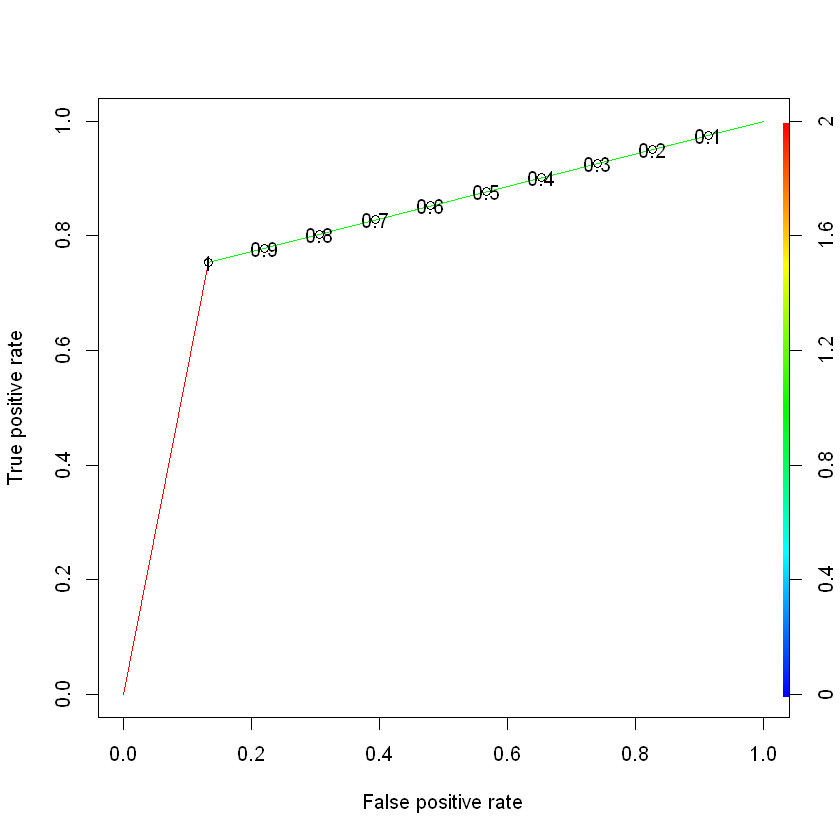

In [365]:
library(ROCR)
ROCRpred <- prediction(over_predtest,over_test1$income)
ROCRpref <- performance(ROCRpred,"tpr","fpr")
plot(ROCRpref, colorize=TRUE,print.cutoffs.at=seq(0.1,by=0.1))

# Random Forest Model [After Over Sampling]

In [229]:
rf = randomForest(income~., data=over_train1)
table(predict(rf), over_train1$income)

   
        0     1
  0 11348   942
  1  2560 12899

In [230]:
summary(rf)

                Length Class  Mode     
call                3  -none- call     
type                1  -none- character
predicted       27749  factor numeric  
err.rate         1500  -none- numeric  
confusion           6  -none- numeric  
votes           55498  matrix numeric  
oob.times       27749  -none- numeric  
classes             2  -none- character
importance         93  -none- numeric  
importanceSD        0  -none- NULL     
localImportance     0  -none- NULL     
proximity           0  -none- NULL     
ntree               1  -none- numeric  
mtry                1  -none- numeric  
forest             14  -none- list     
y               27749  factor numeric  
test                0  -none- NULL     
inbag               0  -none- NULL     
terms               3  terms  call     

In [317]:
rfpred <- predict(rf,newdata = over_test1)
rfpred

7    10    11    13    19    21    25    28    30    31    34    36    40 
    0     1     0     0     1     0     0     1     0     0     0     1     0 
   54    57    58    63    70    71    76    80    81    83    86    88    90 
    0     0     0     0     1     1     0     1     0     0     0     1     0 
   93    95    96   107   114   118   119   123   127   134   136   138   143 
    1     0     0     0     1     0     1     0     0     0     0     0     1 
  145   147   150   153   154   155   158   159   170   175   185   187   194 
    0     0     0     0     0     0     0     0     1     1     0     0     0 
  198   208   211   212   213   218   219   226   230   231   235   236   242 
    0     0     0     0     0     0     0     0     0     1     0     0     1 
  249   253   254   257   259   262   269   270   274   286   289   294   298 
    0     1     1     0     1     0     0     0     0     0     0     0     0 
  299   300   303   311   312   316   317   319   325   332   333   336   342 
    0     0     0     1     0     0     1     0     0     0     0     1     0 
  344   345   346   348   349   359   362   365   374   376   379   384   385 
    0     0     0     0     1     1     1     1     0     0     0     0     0 
  386   390   394   395   397   400   403   410   411   417   418   424   428 
    0     0     0     0     0     0     0     0     0     0     0     0     0 
  437   443   451   453   461   467   474   478   487   489   491   496   500 
    0     0     0     1     0     0     0     0     1     1     0     0     0 
  501   507   510   511   513   516   517   522   527   534   540   544   548 
    0     0     0     0     0     0     0     0     0     0     0     0     0 
  557   563   570   572   574   576   579   583   587   590   593   595   596 
    1     1     0     1     1     1     0     0     0     1     0     1     0 
  603   605   606   624   625   628   636   642   647   649   652   653   661 
    1     0     0     0     1     0     1     0     0     0     1     0     1 
  663   664   673   674   683   685   686   692   695   697   702   708   709 
    0     0     0     0     0     0     0     0     0     1     0     0     0 
  711   712   716   731   735   736   741   742   744   747   752   760   763 
    0     0     0     0     0     0     0     0     0     1     0     1     0 
  770   774   778   779   781   787   788   793   794   795   796   801   806 
    0     0     1     0     0     1     1     0     0     0     1     1     0 
  822   825   826   830   838   842   843   847   853   857   861   873   880 
    0     0     0     0     0     1     0     1     1     1     0     0     0 
  885   887   889   890   894   897   898   910   913   914   918   920   922 
    0     0     0     0     0     0     0     0     0     0     0     0     0 
  923   924   927   928   937   940   943   944   945   949   960   963   967 
    0     0     0     0     1     0     1     1     1     1     1     0     0 
  972   976   978   981   988  1001  1013  1016  1018  1021  1025  1027  1033 
    0     0     0     0     0     1     1     1     0     0     1     1     0 
 1035  1039  1041  1042  1045  1054  1063  1065  1072  1074  1085  1086  1100 
    0     0     0     0     0     0     0     0     0     0     0     0     0 
 1104  1108  1120  1123  1124  1129  1131  1135  1136  1138  1139  1143  1146 
    0     0     0     1     0     1     0     0     0     0     0     0     0 
 1151  1152  1153  1155  1161  1169  1172  1177  1179  1181  1190  1191  1192 
    0     0     0     0     0     0     0     0     0     0     0     0     0 
 1198  1203  1206  1214  1222  1224  1230  1235  1243  1244  1247  1248  1249 
    0     0     0     0     0     0     0     0     0     0     0     0     0 
 1254  1255  1259  1260  1261  1265  1267  1269  1271  1276  1279  1280  1282 
    0     0     0     0     0     0     0     0     0     0     0     0     0 
 1285  1296  1301  1303  1305  1309  1310  1311  1312 

In [318]:
rftab<- table(pred = rfpred,obser=over_test1$income)
rftab

    obser
pred    0    1
   0 3957  151
   1  675 4548

In [319]:
accuracy <- sum(rftab[1,1],rftab[2,2])/sum(rftab)
accuracy

[1] 0.9114779

In [321]:
confusionMatrix(rftab,positive='0')

Confusion Matrix and Statistics

    obser
pred    0    1
   0 3957  151
   1  675 4548
                                          
               Accuracy : 0.9115          
                 95% CI : (0.9055, 0.9172)
    No Information Rate : 0.5036          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8228          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.8543          
            Specificity : 0.9679          
         Pos Pred Value : 0.9632          
         Neg Pred Value : 0.8708          
             Prevalence : 0.4964          
         Detection Rate : 0.4241          
   Detection Prevalence : 0.4403          
      Balanced Accuracy : 0.9111          
                                          
       'Positive' Class : 0               
                                          

In [320]:
confusionMatrix(rftab,positive='1')

Confusion Matrix and Statistics

    obser
pred    0    1
   0 3957  151
   1  675 4548
                                          
               Accuracy : 0.9115          
                 95% CI : (0.9055, 0.9172)
    No Information Rate : 0.5036          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8228          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9679          
            Specificity : 0.8543          
         Pos Pred Value : 0.8708          
         Neg Pred Value : 0.9632          
             Prevalence : 0.5036          
         Detection Rate : 0.4874          
   Detection Prevalence : 0.5597          
      Balanced Accuracy : 0.9111          
                                          
       'Positive' Class : 1               
                                          

# Random Forest ROC Curve

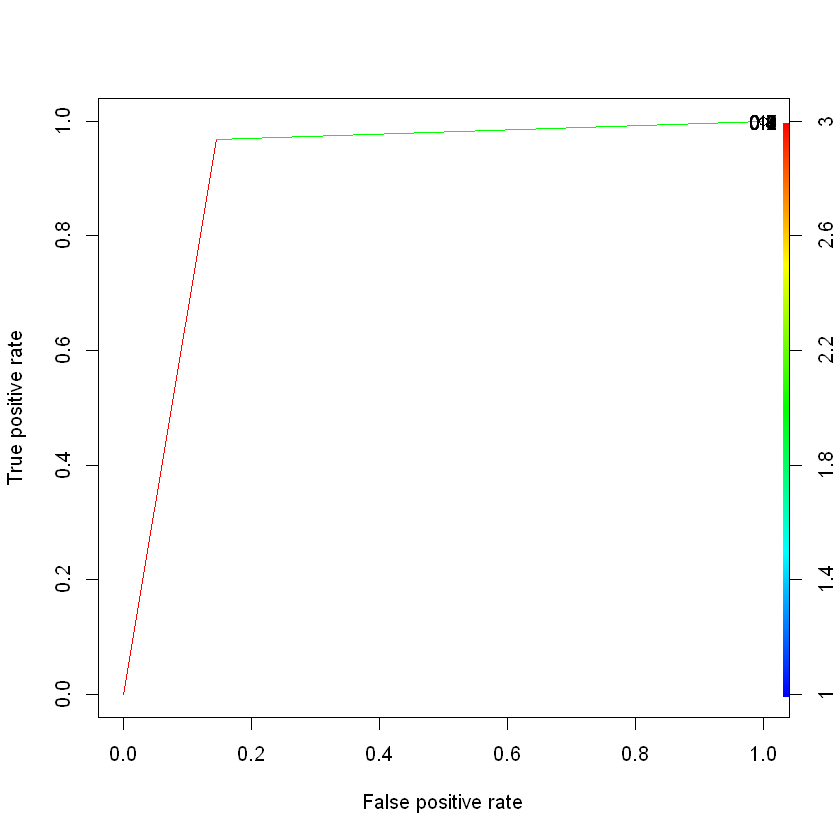

In [366]:
library(ROCR)
ROCRpred <- prediction(as.numeric(rfpred),as.numeric(over_test1$income))
ROCRpref <- performance(ROCRpred,"tpr","fpr")
plot(ROCRpref, colorize=TRUE,print.cutoffs.at=seq(0.1,by=0.1))

# Mannual Feature Selction

In [322]:
new_over_train<- over_train1 %>% select(1,2,3,4,5,6,7,8,9,10,11,12,87,88,89,94)
head(new_over_train)

age fnlwgt   education.num capital.gain capital.loss hours.per.week
1 90  222.7453 12.614337     0            4356         40            
2 82  277.5985 12.614337     0            4356         18            
3 66  317.9809 14.578941     0            4356         40            
4 54  283.8097  3.894513     0            3900         40            
5 41  366.4923 14.578941     0            3900         40            
6 34  338.2336 12.614337     0            3770         45            
  workclass.. PC1       PC2        PC3         PC4        PC5        
1 0           1.0089237 -0.5159108  0.39857466 -0.3522992  0.48532333
2 0           0.9524375 -0.5160725  0.40101714 -0.5654073  0.29287847
3 0           0.9994782 -0.9529043 -0.39452802  0.1277231 -0.93615090
4 0           0.9478385 -0.9255389 -0.04651659 -0.6024531 -0.07381111
5 0           0.9096241 -0.4350095 -0.52753967  0.2373151  0.54395992
6 0           1.0215010 -0.9322431 -0.08228861 -0.5136792 -0.11579518
  PC80          PC81          PC82          income
1 -2.061752e-16 -7.892992e-17 -1.709365e-16 0     
2  9.411132e-15 -2.875304e-15  4.951973e-16 0     
3 -1.441298e-15 -4.385381e-15  6.617307e-16 0     
4 -4.397267e-15  5.134781e-16 -2.724449e-15 0     
5  5.640420e-16 -3.667856e-16 -3.668139e-15 0     
6 -2.496010e-15  1.339207e-15 -1.947293e-15 0

In [369]:
new_over_test<- over_test1 %>% select(1,2,3,4,5,6,7,8,9,10,11,12,87,88,89,94)
head(new_over_test)

age fnlwgt   education.num capital.gain capital.loss hours.per.week
7  68  442.2033 12.61434      0            3683         40            
10 51  294.5309 14.57894      0            2603         40            
11 21  160.4702 16.60346      0            2603         40            
13 71  248.3180 12.61434      0            2489         15            
19 36  419.7605 12.61434      0            2377         60            
21 23  301.4180 12.61434      0            2377         40            
   workclass.. PC1        PC2          PC3        PC4         PC5       
7  0            1.0085156 -0.794839805  1.2150345  0.15645068 0.30704415
10 0           -1.0362531 -0.005578717 -0.2479403 -0.30505177 0.07838001
11 0           -1.0892625  0.054109694 -0.2169179 -0.40009557 0.04533075
13 0           -0.9937871 -0.085180300 -0.1674820 -0.08676447 0.31595942
19 0           -0.9937871 -0.085180300 -0.1674820 -0.08676447 0.31595942
21 0           -1.0067766 -0.009403665 -0.3031657 -0.31642298 0.16039258
   PC80          PC81          PC82          income
7  -1.344154e-15  8.916479e-15 -4.278762e-15 0     
10  3.415927e-15 -5.273559e-16  2.105021e-15 0     
11  9.075172e-16 -3.608225e-16 -6.427813e-16 0     
13 -5.906477e-15  9.575674e-16 -4.762479e-16 0     
19 -5.906477e-15  9.575674e-16 -4.762479e-16 0     
21 -2.811730e-15 -2.498002e-16 -1.864027e-15 0

In [367]:
rf = randomForest(income~., data=new_over_train)
table(predict(rf), new_over_train$income)

   
        0     1
  0 11939   459
  1  1969 13382

In [368]:
summary(rf)

                Length Class  Mode     
call                3  -none- call     
type                1  -none- character
predicted       27749  factor numeric  
err.rate         1500  -none- numeric  
confusion           6  -none- numeric  
votes           55498  matrix numeric  
oob.times       27749  -none- numeric  
classes             2  -none- character
importance         15  -none- numeric  
importanceSD        0  -none- NULL     
localImportance     0  -none- NULL     
proximity           0  -none- NULL     
ntree               1  -none- numeric  
mtry                1  -none- numeric  
forest             14  -none- list     
y               27749  factor numeric  
test                0  -none- NULL     
inbag               0  -none- NULL     
terms               3  terms  call     

In [372]:
rfpred <- predict(rf,newdata = new_over_test)
head(rfpred)

7 10 11 13 19 21 
 0  1  0  0  1  0 
Levels: 0 1

In [373]:
rftab<- table(pred = rfpred,obser=new_over_test$income)
rftab

    obser
pred    0    1
   0 3958  149
   1  674 4550

In [374]:
accuracy <- sum(rftab[1,1],rftab[2,2])/sum(rftab)
accuracy

[1] 0.9117994

In [375]:
confusionMatrix(rftab,positive='0')

Confusion Matrix and Statistics

    obser
pred    0    1
   0 3958  149
   1  674 4550
                                          
               Accuracy : 0.9118          
                 95% CI : (0.9059, 0.9175)
    No Information Rate : 0.5036          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8234          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.8545          
            Specificity : 0.9683          
         Pos Pred Value : 0.9637          
         Neg Pred Value : 0.8710          
             Prevalence : 0.4964          
         Detection Rate : 0.4242          
   Detection Prevalence : 0.4401          
      Balanced Accuracy : 0.9114          
                                          
       'Positive' Class : 0               
                                          

In [376]:
confusionMatrix(rftab,positive='1')

Confusion Matrix and Statistics

    obser
pred    0    1
   0 3958  149
   1  674 4550
                                          
               Accuracy : 0.9118          
                 95% CI : (0.9059, 0.9175)
    No Information Rate : 0.5036          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8234          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9683          
            Specificity : 0.8545          
         Pos Pred Value : 0.8710          
         Neg Pred Value : 0.9637          
             Prevalence : 0.5036          
         Detection Rate : 0.4876          
   Detection Prevalence : 0.5599          
      Balanced Accuracy : 0.9114          
                                          
       'Positive' Class : 1               
                                          

In [377]:
rfpred22 <- as.data.frame(rfpred)
dim(rfpred22)
d<-over_test1$income
d <- as.data.frame(d)
dim(d)
d1 <- as.data.frame(over_predtest)
dim(d1)

[1] 9331    1

[1] 9331    1

[1] 9331    1

# Random Forest ROC Curve After Feature Selection

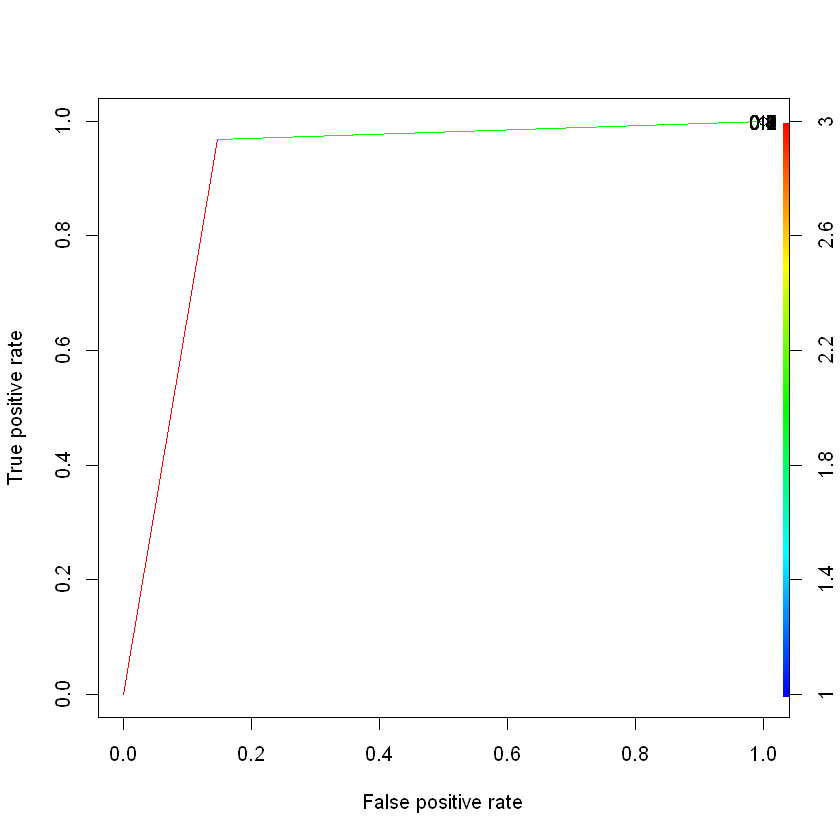

In [378]:
library(ROCR)
ROCRpred <- prediction(as.numeric(rfpred),as.numeric(over_test1$income))
ROCRpref <- performance(ROCRpred,"tpr","fpr")
plot(ROCRpref, colorize=TRUE,print.cutoffs.at=seq(0.1,by=0.1))